# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.model_selection import train_test_split

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_main = pd.read_csv('/content/drive/MyDrive/Python Course/innhotelsgroup.csv')

In [5]:
#copying data
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

###View dataset

In [24]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [25]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

* The Booking_ID column is containing unique values.
* There are 4 different types of meal plans (Not selected, Meal Plan 1, Meal Plan 2, Meal Plan 3)
* Booking_status is either Not_Canceled or Canceled

###Shape of Dataset

In [26]:
data.shape

(36275, 19)

* There are 36275 rows and 19 columns in our dataset

###Data Types

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The are 5 columns that are of the object type and 14 numerical columns.

In [28]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values

In [29]:
data.duplicated().sum()

0

* There are no dupliate values in the data

###Dropping the columns with all unique values

In [8]:
data.Booking_ID.nunique()

36275

* The Booking_ID column contains only unique values, so we can drop it.

In [9]:
data = data.drop(["Booking_ID"], axis=1)

###Statistical summary of the data

In [32]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* The no_of_adults ranges from 0 to 4.
* The no_of_children ranges from 0 to 10.
* The no_of_weekend_nights ranges from 0 to 7.
* The no_of_week_nights ranges from 0 to 17 with the mean being 2.2.
* The lead_time ranges from 0 to 443 days and the mean being about 85 days.
* The arrival_year ranges from 2017 to 2018.
* The arrival_month ranges from 1 to 12 (With 1 being Januarary and 12 being December).
* The no_of_previous_cancellations ranges from 0 to 13. The mean is less than 1.
* The no_of_previous_bookins_not_canceled ranges from 0 to 58 with 75% being 0.This means that a majority of the customers do not cancel when they book a stay.
* The avg_price_per_room ranges from 0 to 540 euros with a mean of 103.42 euros.
* The no_of_special_requests ranges from 0 to 5.

# Exploratory Data Analysis (EDA)

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [6]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [7]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Univariate Analysis

###Lead Time

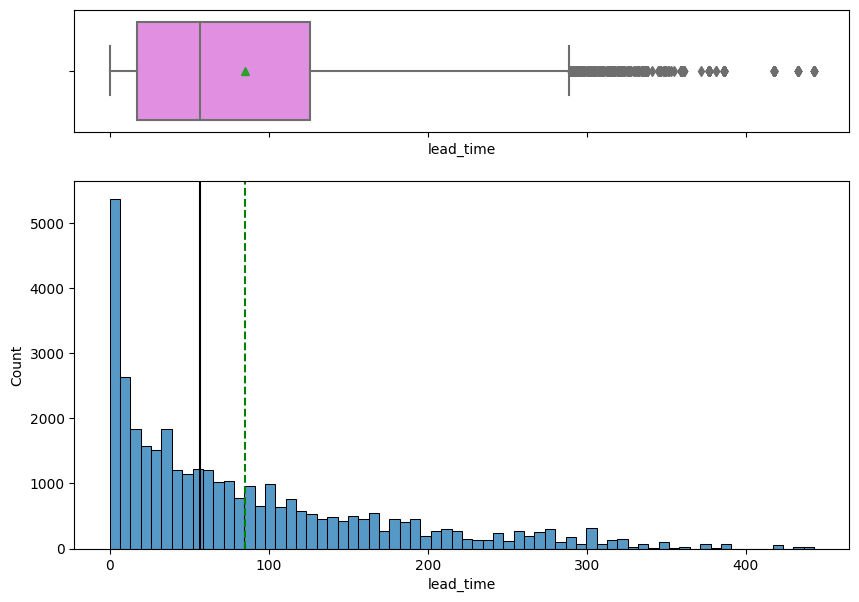

In [35]:
histogram_boxplot(data, 'lead_time')

* The lead_time distribution is highly right skewed.
* There are several outliers

###Price per room

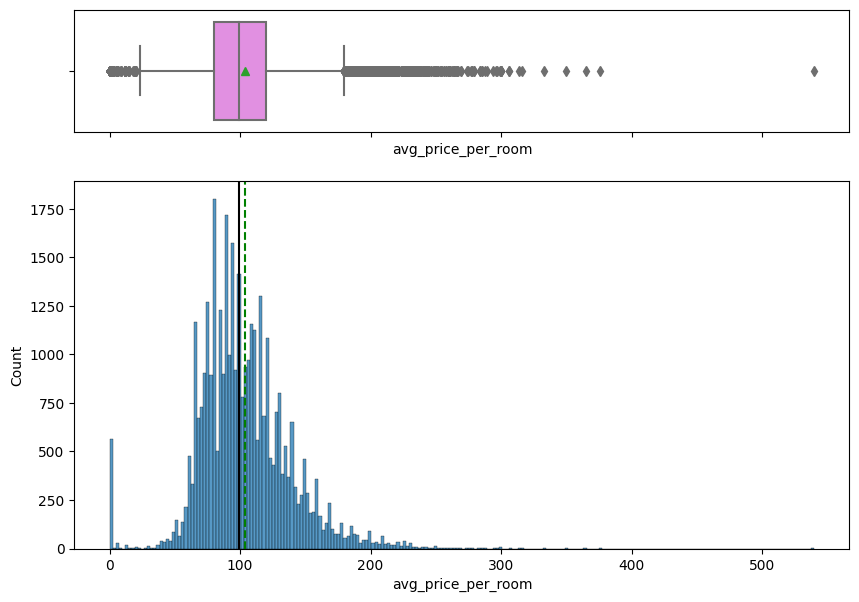

In [36]:
histogram_boxplot(data, 'avg_price_per_room')

* The average price per room distribution is slightly right skewed with outliers

In [10]:
data[data["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [11]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [12]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR

In [13]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

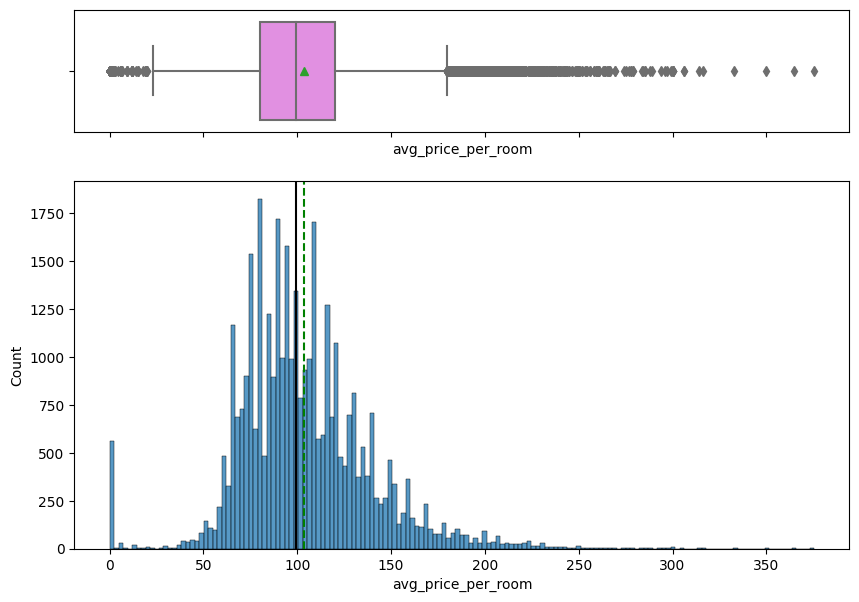

In [14]:
#checking the distribution after fixing the outliers at or above 500
histogram_boxplot(data, 'avg_price_per_room')

###Market segment type

In [48]:
data.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

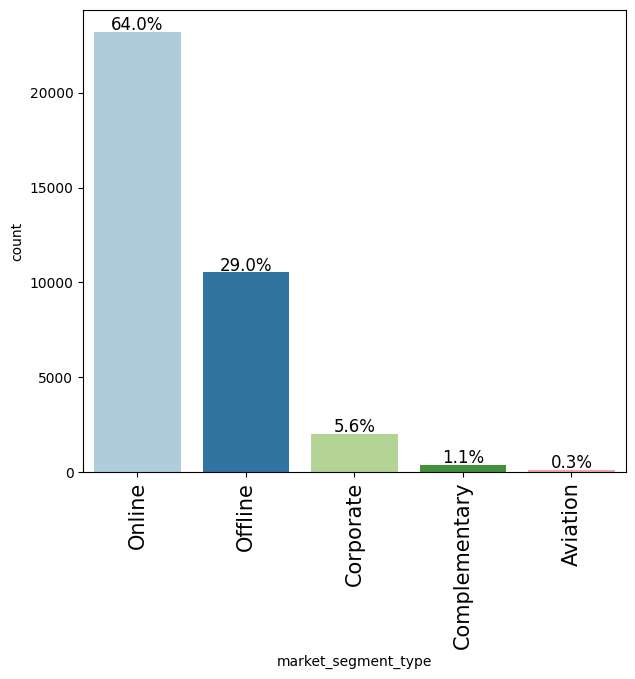

In [53]:
labeled_barplot(data,'market_segment_type', perc=True)

* A Market segment type: Online at 64% was the majority with offline being next at 29% and them corporate at 5.6%

###Number of adults

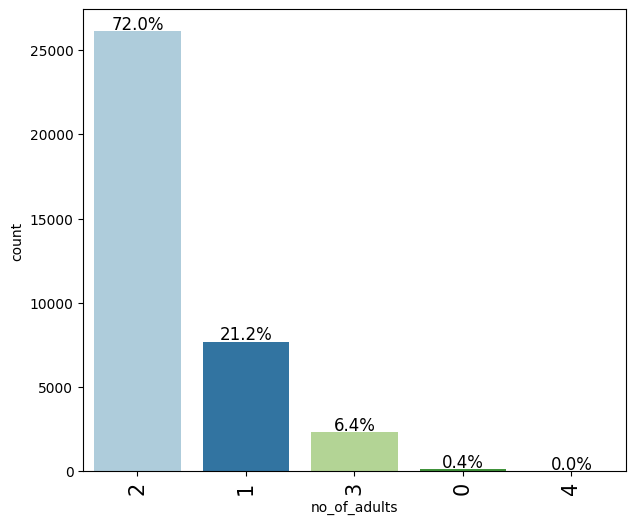

In [43]:
labeled_barplot(data, 'no_of_adults', perc=True)

* The majority of bookings included 2 adults

###Number of children

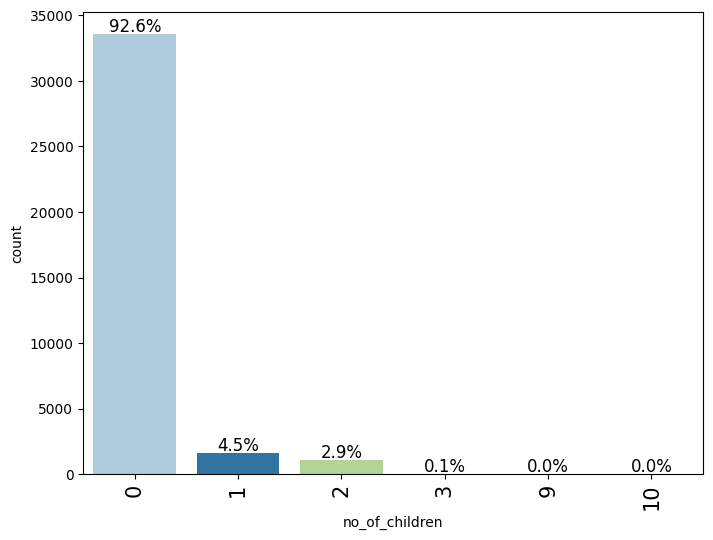

In [42]:
labeled_barplot(data, 'no_of_children', perc=True)

* The majority of booking included 0 children with 4.5% including 1 child, and 2.9% including 2 children.
* The graph shows 0% for 9 and 10 children. We will combine the 3, 9, and 10 children.

In [15]:
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

###Number of weekend nights

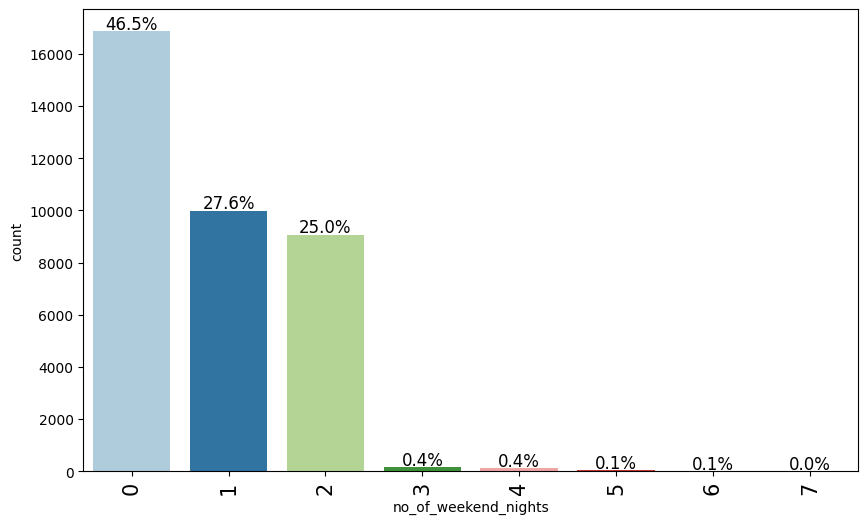

In [54]:
labeled_barplot(data,'no_of_weekend_nights', perc=True)

* Almost half booked 0 weekend nights.
* 27.6% of bookings included 1 weekend night
* 25% of bookings included 2 weekend nights

###Number of week nights

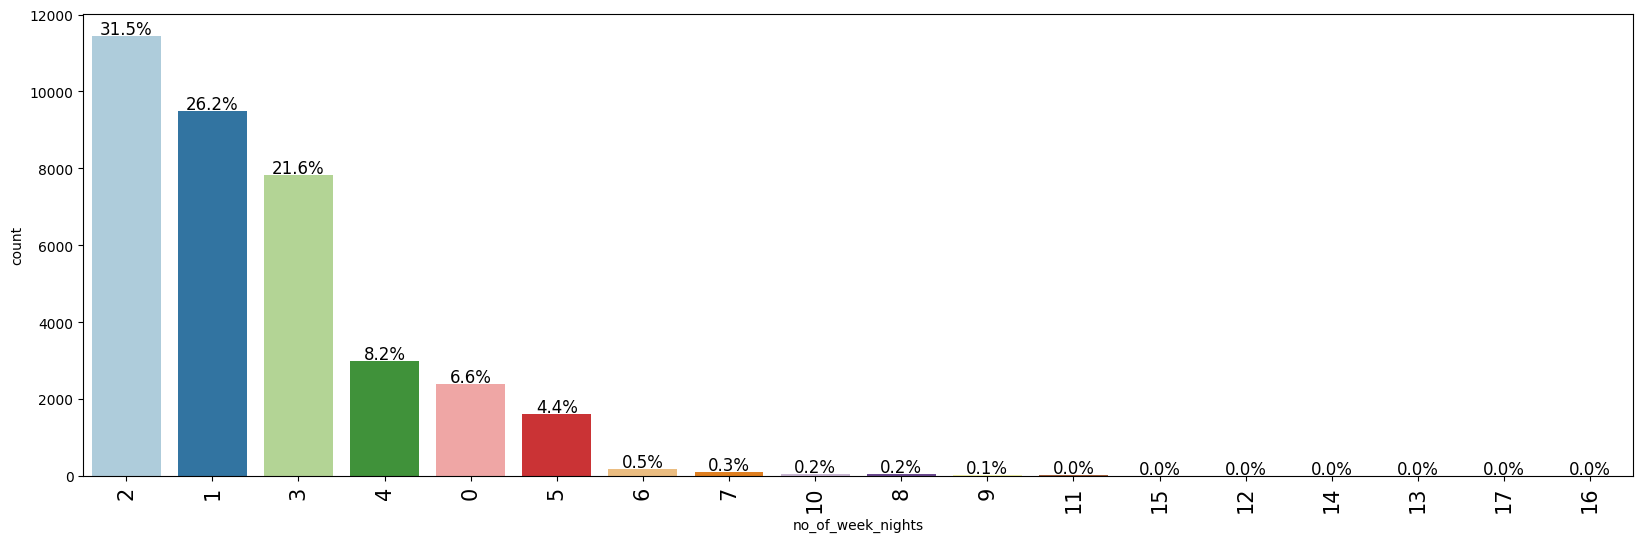

In [55]:
labeled_barplot(data,'no_of_week_nights', perc=True)

* 31.5% included 2 week nights (the most common)
* 26.2% of bookins included 1 week night
* Bookings that included 11-16 week nights are all at 0% so we will combine those with 10 week nights.

In [16]:
data["no_of_week_nights"] = data["no_of_week_nights"].replace([11,12,13,14,15,16,17], 10)

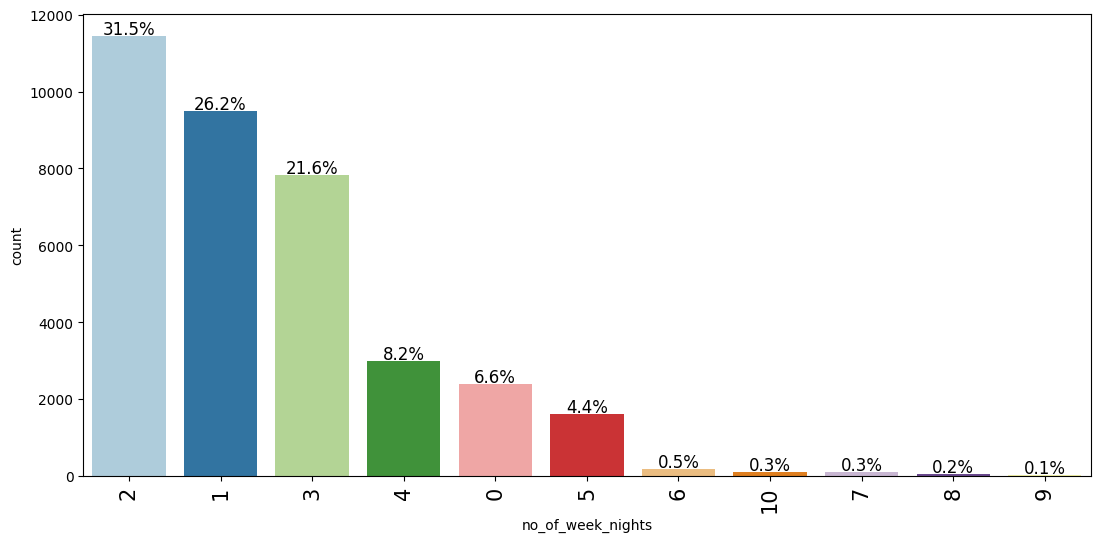

In [17]:
labeled_barplot(data,'no_of_week_nights', perc=True)

###Type of meal plan

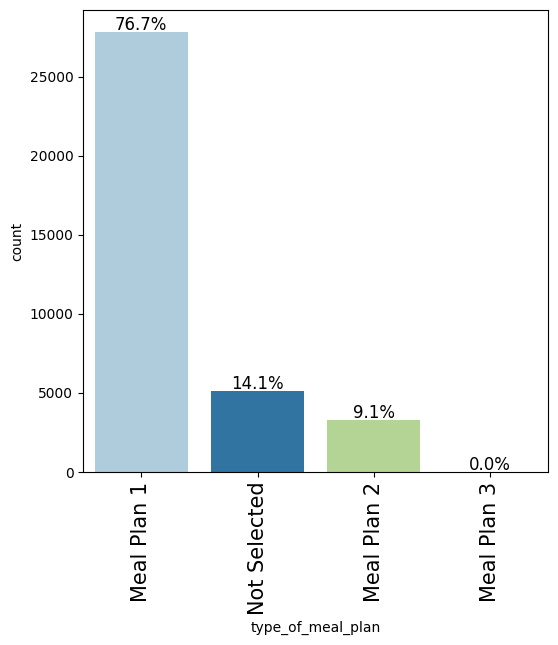

In [70]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

* Customers prefered Meal Plan 1 with their booking.

###Required car parking space

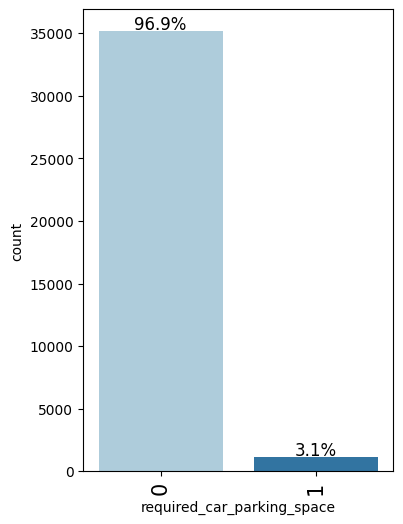

In [61]:
labeled_barplot(data,'required_car_parking_space', perc=True)

* A majority of the bookings did not require a car parking space.

###Room type reserved

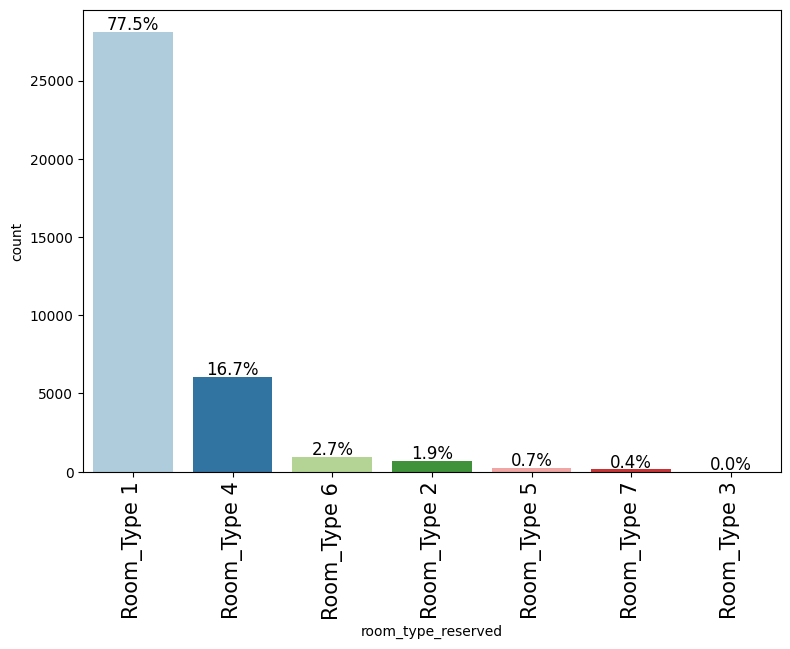

In [62]:
labeled_barplot(data, 'room_type_reserved', perc=True)

* A majority of the bookings reserved Room_type 1 at 77.5%
* 16.7% reserved Rooom_Type 4
* 0% reserved Room_Type 3

###Arrival year

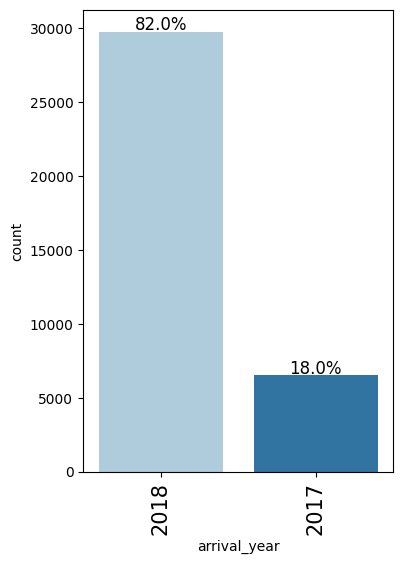

In [67]:
labeled_barplot(data, 'arrival_year', perc=True)

* A majority of the customers booked to arrive in 2018 at 82%.

###Arrival month

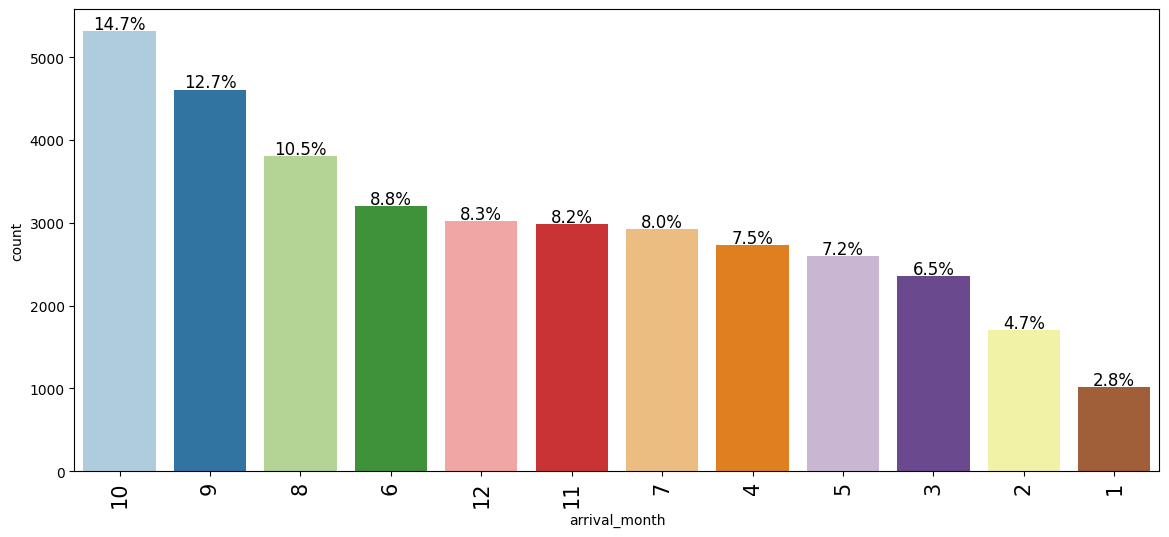

In [63]:
labeled_barplot(data, 'arrival_month', perc=True)

* October is the most common arrival month at 14.7%
* August-October is the most popular time for bookings at the hotel.
* The least popular months are January, February, and March.

###Repeated guest

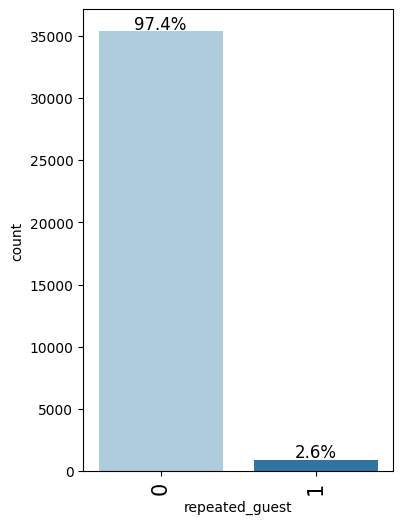

In [69]:
labeled_barplot(data, 'repeated_guest', perc=True)

* Most of the bookings were not for repeated guests

###Previous Booking Cancellations

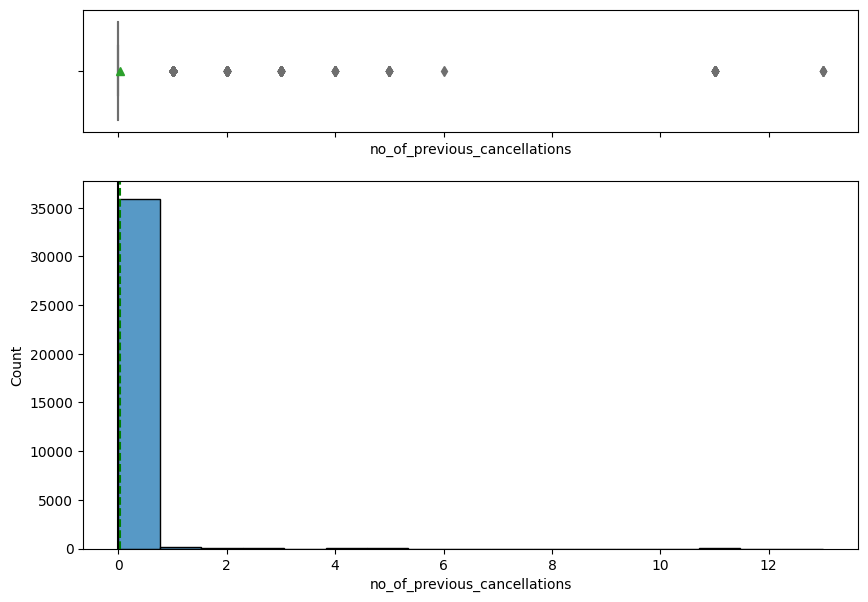

In [39]:
histogram_boxplot(data, 'no_of_previous_cancellations')

* The number of previous cancellations is very right skewed due to the fact that the mean number of cancellations is slightly over 0 with many outliers more than 0.

###Number of previous bookings not canceled

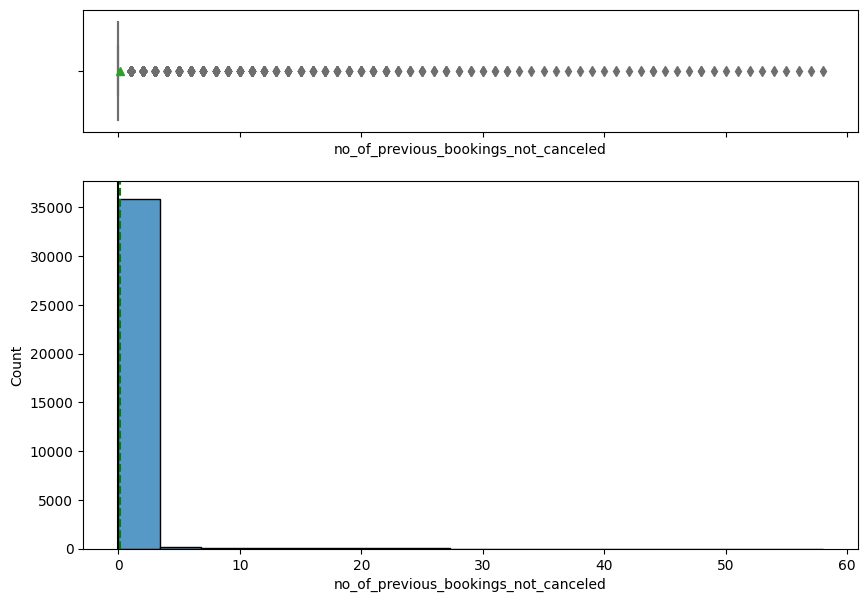

In [40]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

* There are many outliers

###Number of special requests

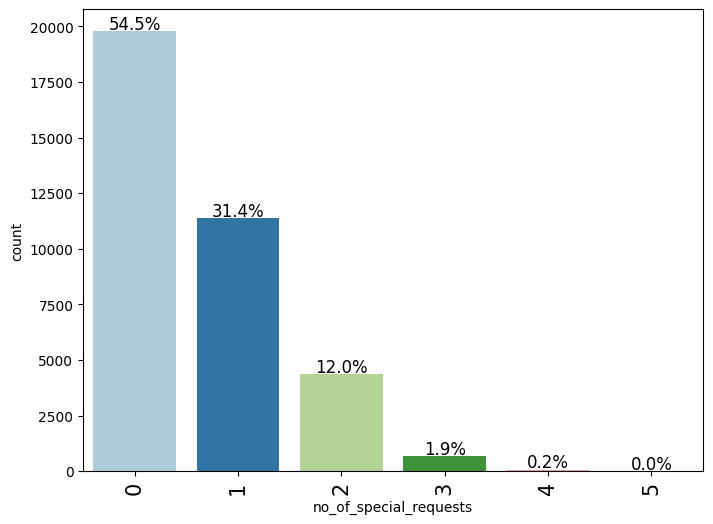

In [72]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

* 54.5% of bookings had 0 special requests
* 31.4% had 1 special request while 12% had 2 special requests and 1.9% had 3 special requests.
* 0% had 5 special requests so we will combine that with 4 special requests.

In [18]:
data["no_of_special_requests"] = data["no_of_special_requests"].replace([5], 4)

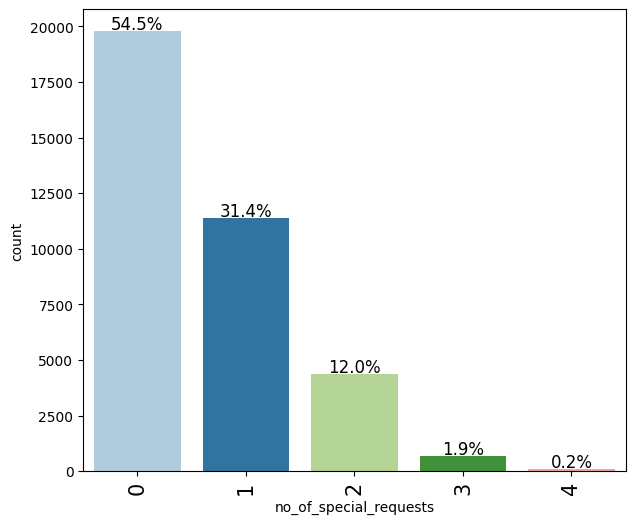

In [19]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

###Booking status

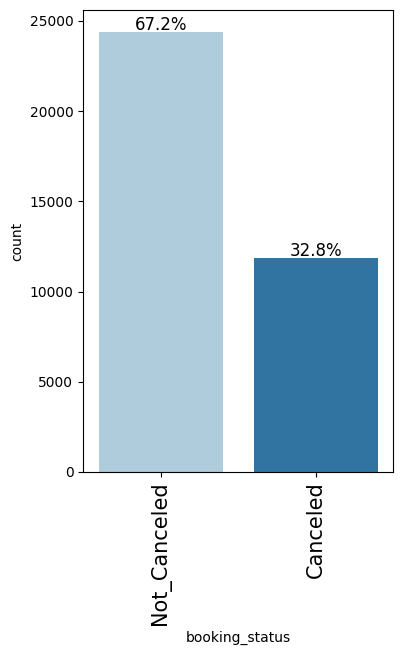

In [66]:
labeled_barplot(data, 'booking_status', perc=True)

* 67.2% of the bookings were not canceled while 32.8% of the bookings were canceled.

In [20]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

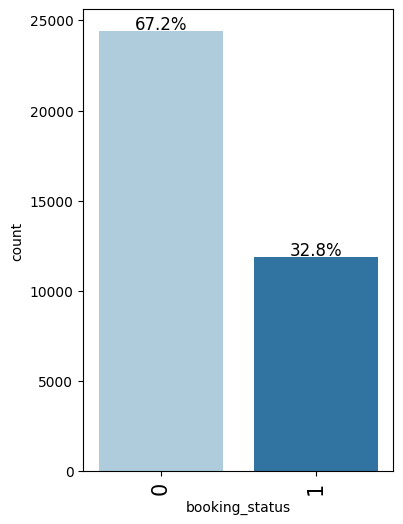

In [21]:
labeled_barplot(data, 'booking_status', perc=True)

##Bivariate Analysis

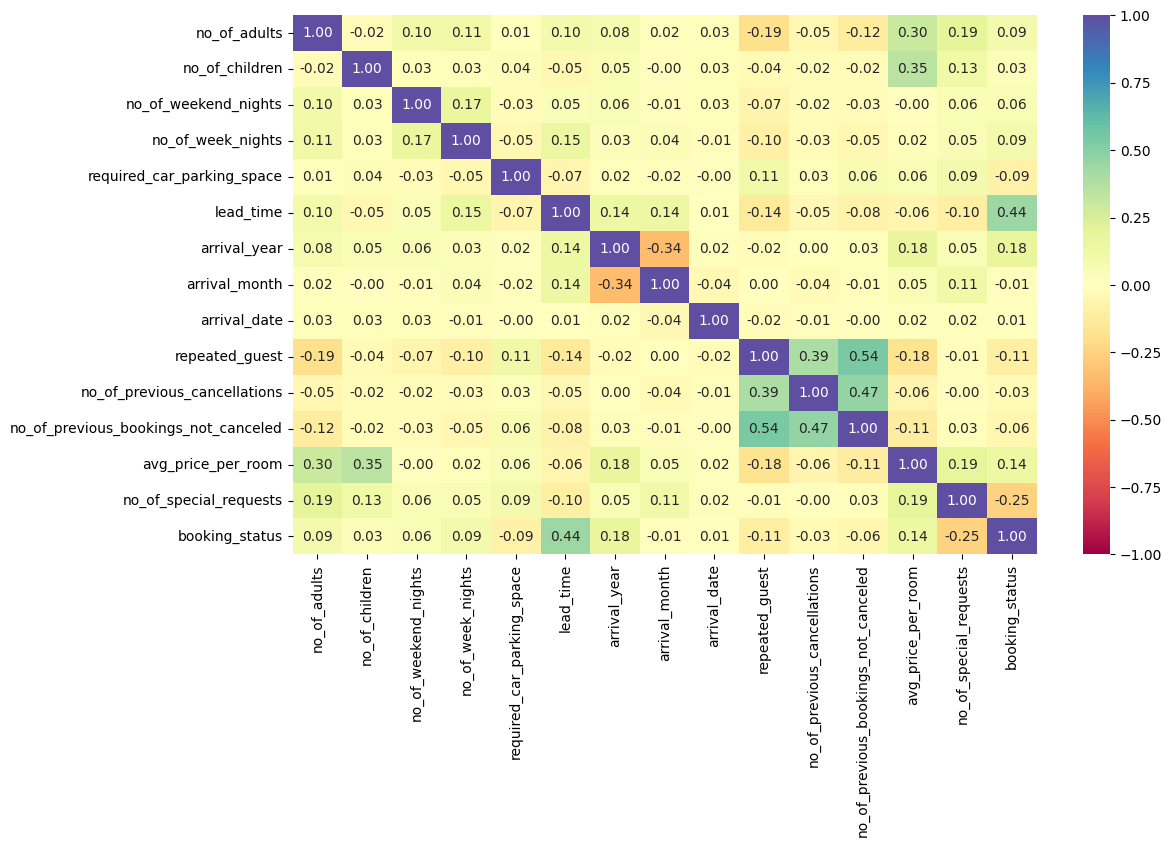

In [79]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Variables with positive correlation:
* avg_price_per_room and no_of_adults
* avg_price_per_room and no_of_children
* lead_time and booking_status
* repeated_guest and no_of_previous_bookings_not_canceled
* no_of_previous_bookings_not_canceled and no_of_previous_cancellations

In [22]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Prices vs Market Segment Type

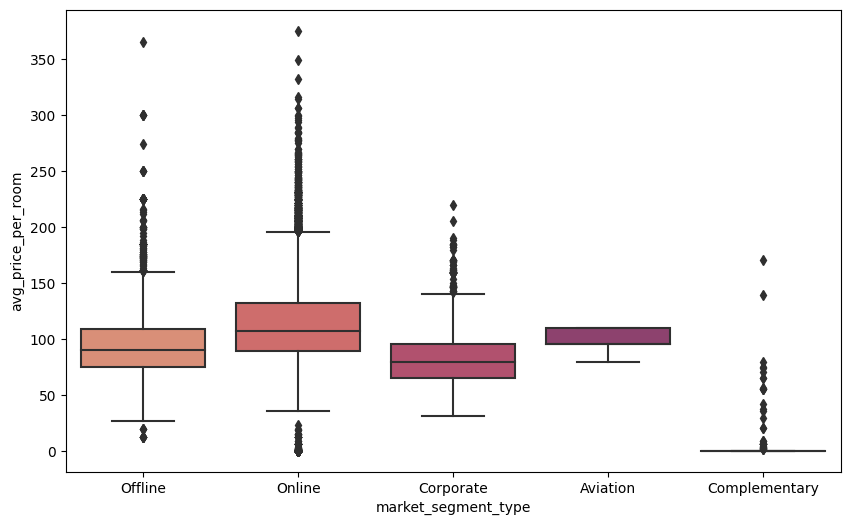

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="flare")
plt.show()

* Online market segment has the highest median average price per room while complementary has the lowest

###Booking status vs Market Segment

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


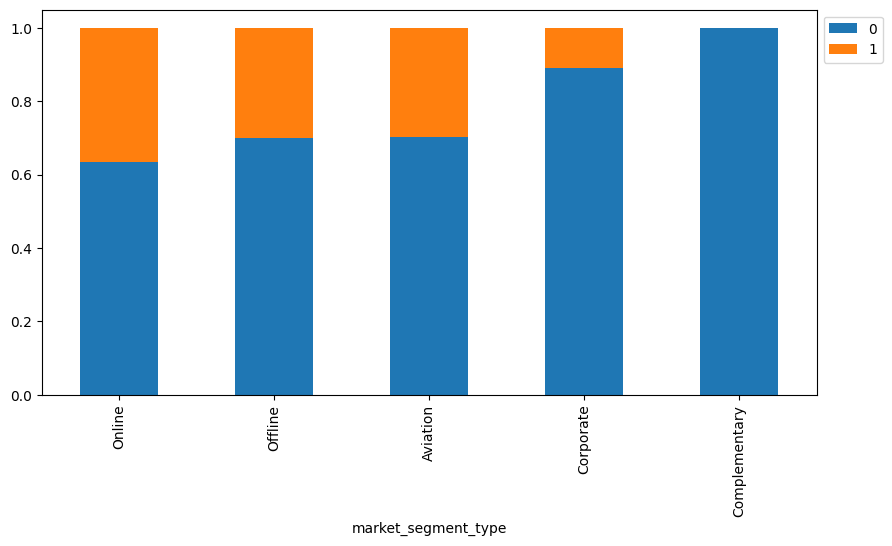

In [90]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Online market segment has the highest number of cancellations while Offline and Aviation have slightly less cancellations followed by corporate with few cancellations and complementary with 0.

###Booking Status vs Special Requests

no_of_special_requests      0      1     2    3   4    All
booking_status                                            
0                       11232   8670  3727  675  86  24390
All                     19777  11373  4364  675  86  36275
1                        8545   2703   637    0   0  11885
------------------------------------------------------------------------------------------------------------------------


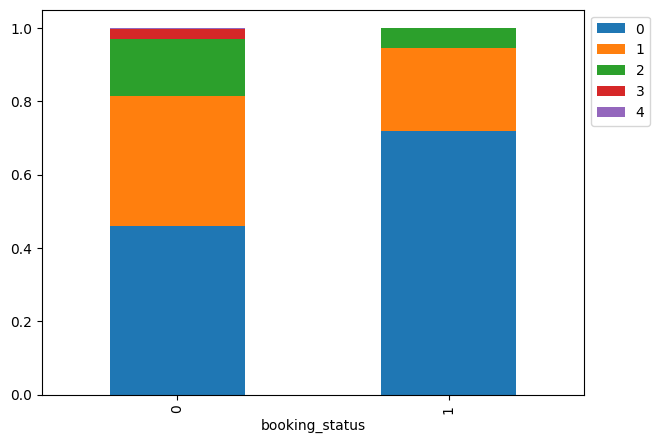

In [91]:
stacked_barplot(data, 'booking_status', 'no_of_special_requests')

* Customers who had 3 or 4 special requests had 0 cancellations

###Special Requests vs Price Per Room

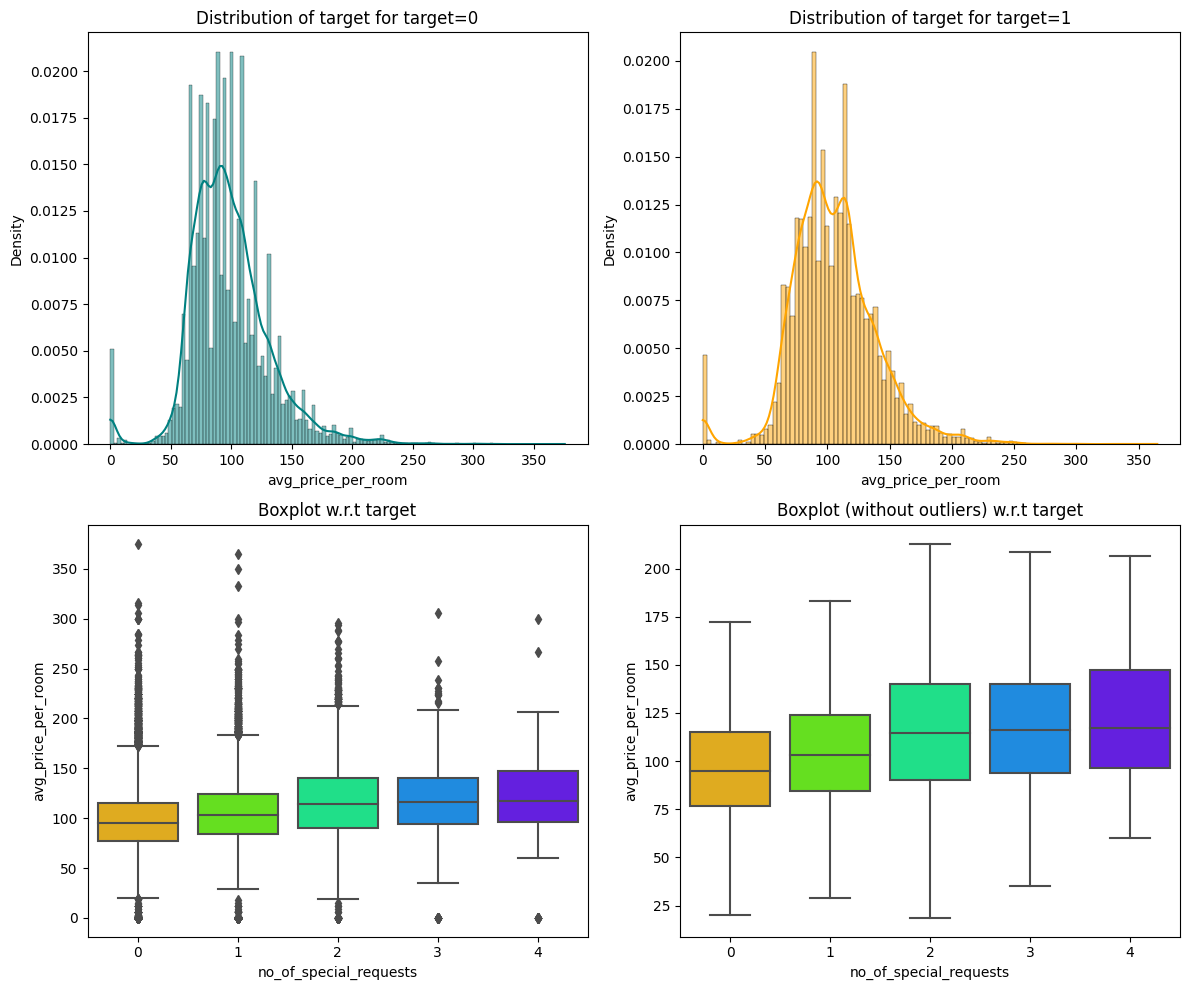

In [97]:
distribution_plot_wrt_target(data, "avg_price_per_room", "no_of_special_requests")

* Bookings with 2-4 special requests have a higher mean average price per room than those that had 0-1 special requests

###Booking Status vs Price per room

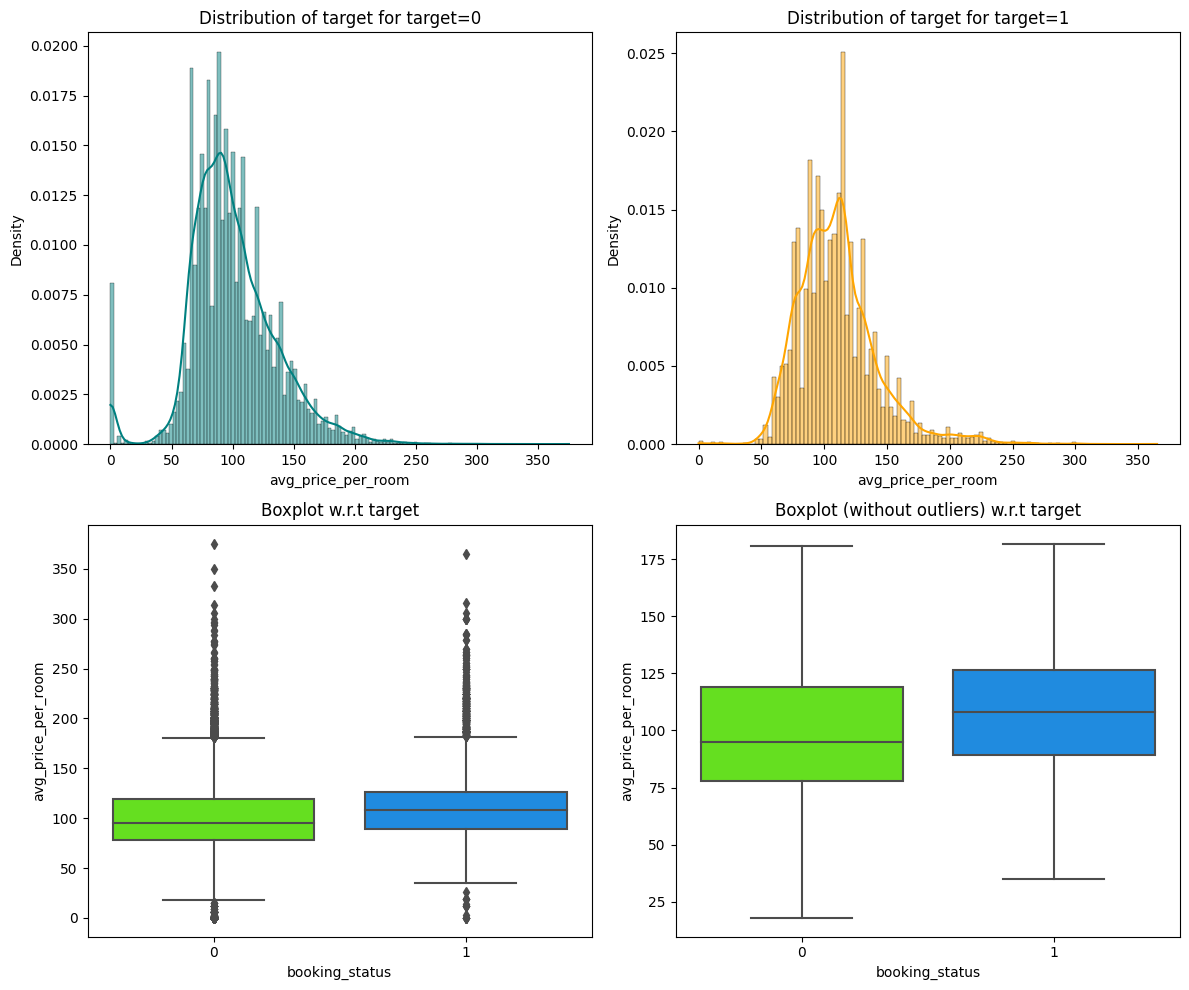

In [96]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* Bookings that were canceled had a higher mean average price per room.

###Booking Status vs Lead Time

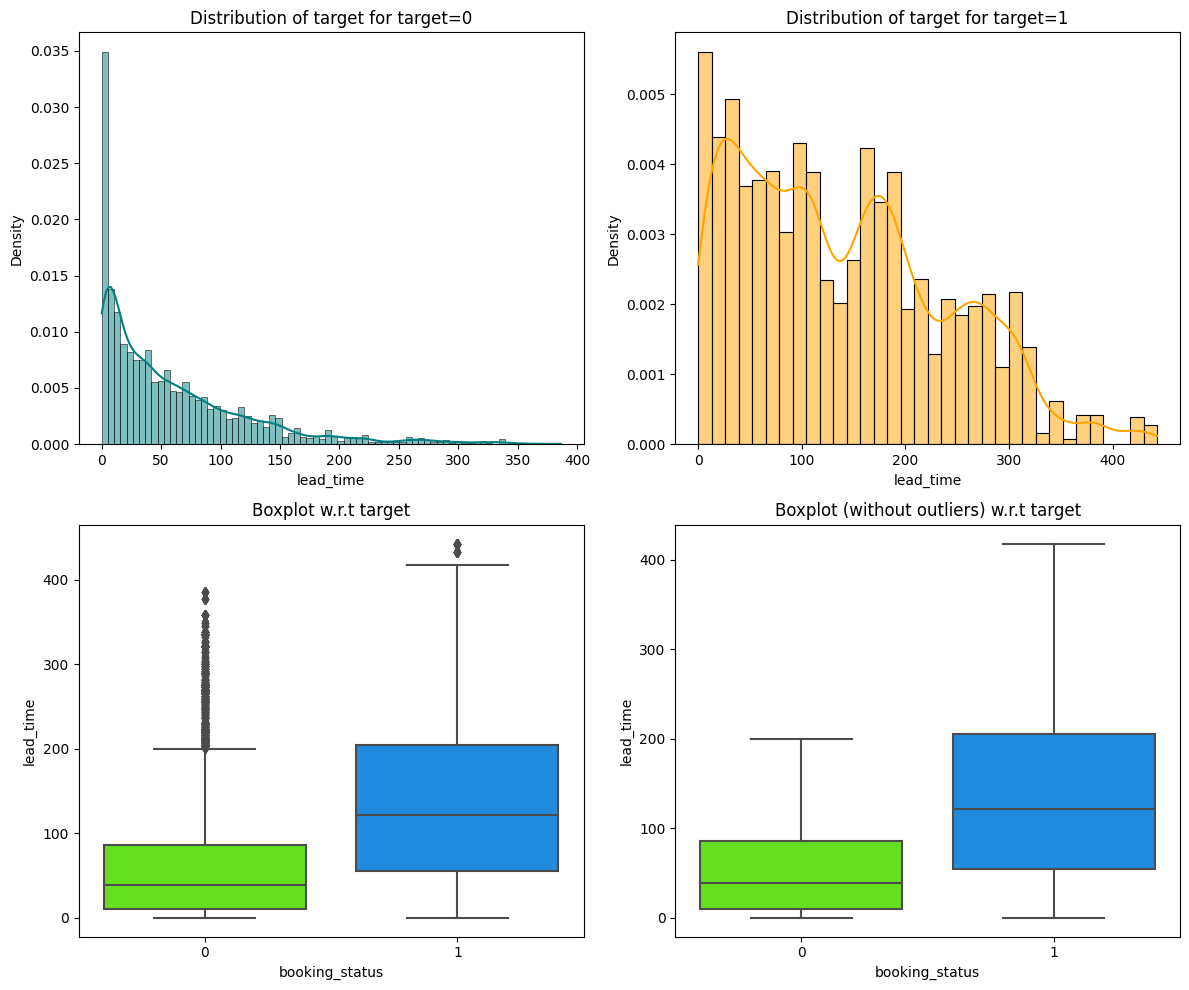

In [98]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* The more lead time, the more likely someone will cancel their booking

###Repeated guest vs Booking Status

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
0               23476  914  24390
1               11869   16  11885
------------------------------------------------------------------------------------------------------------------------


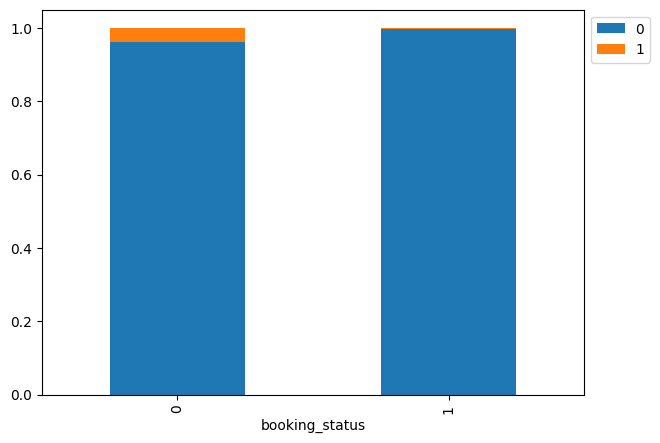

In [100]:
stacked_barplot(data, "booking_status", "repeated_guest")

* Most of the cancellations came from new guests, very few were repeat guests

###Children and adults vs Booking Status

In [101]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [121]:
no_of_family_members = (
    family_data["no_of_adults"] + family_data["no_of_children"])

In [114]:
print(no_of_family_members)

0        2
1        2
3        2
4        2
5        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    2
Length: 28441, dtype: int64


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


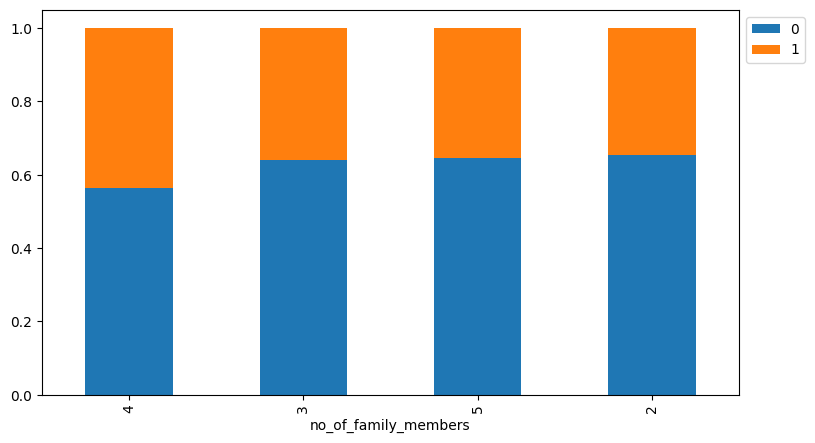

In [117]:
stacked_barplot( family_data,'no_of_family_members', 'booking_status')

* Customers that booked 4 people were more likely to cancel

###Months vs Booking Status

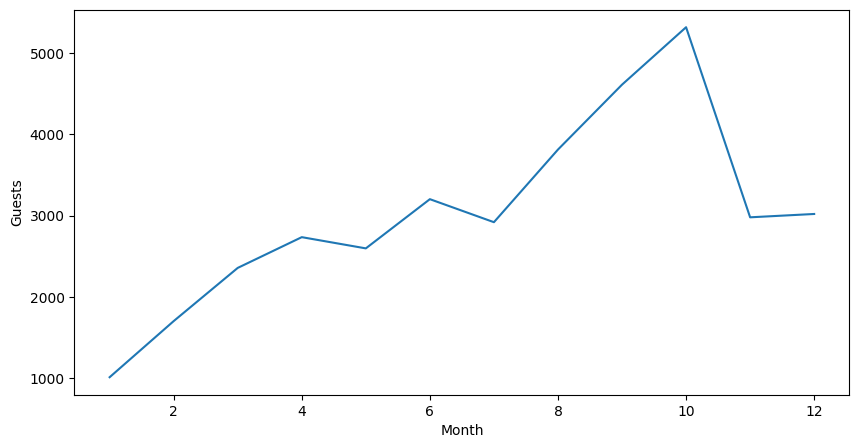

In [125]:
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)})

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


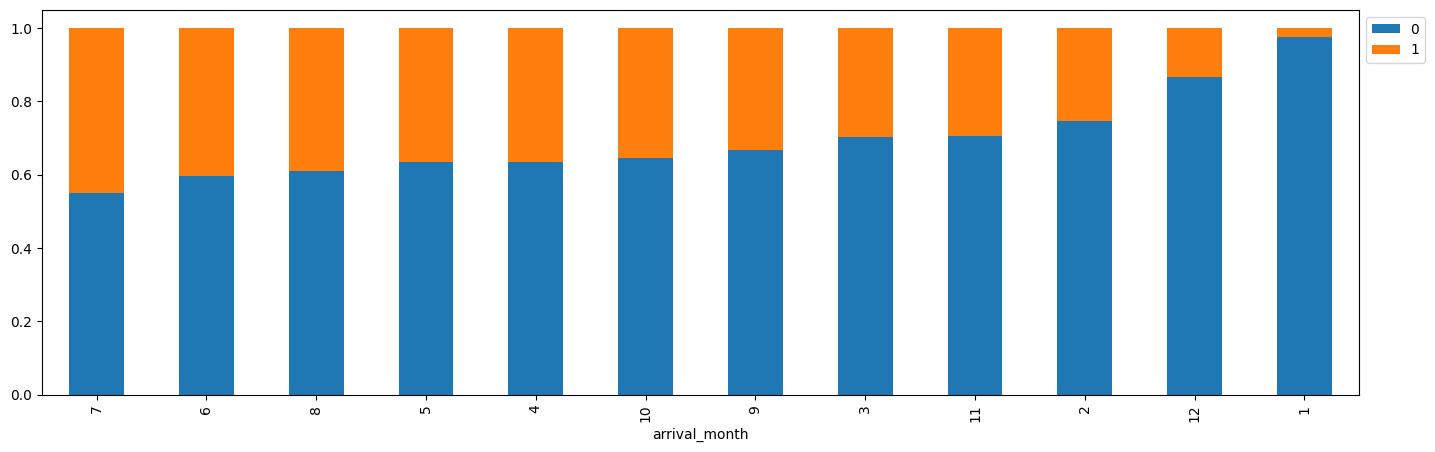

In [128]:
stacked_barplot(data, 'arrival_month', 'booking_status')

* October had the most bookings and the most cancellations, however July and June had the highest amount of cancellations compared to number of bookings
* January had the least amount of cancellations compared to number of bookings

###Month vs Price per room

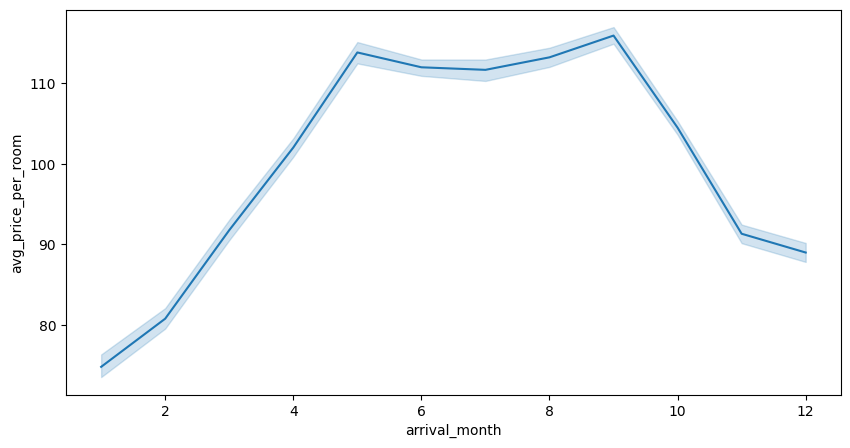

In [130]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, y='avg_price_per_room', x='arrival_month')
plt.show()

* The summer months (May-September) have the highest average price per room.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outlier Check**

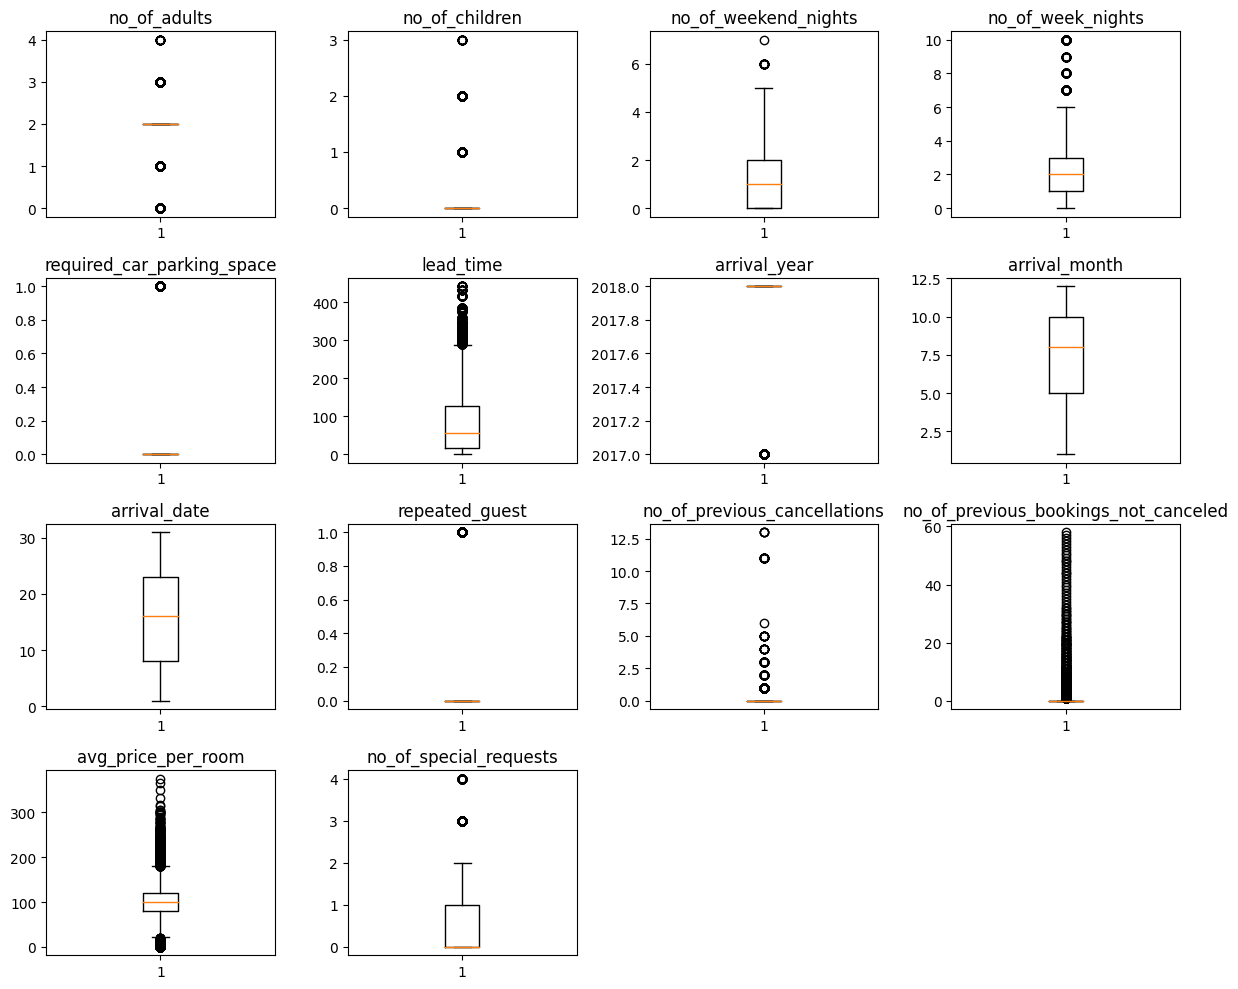

In [48]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are many outliers, however we will not treat them

## EDA

- Exploring the data once again after manipulating it.

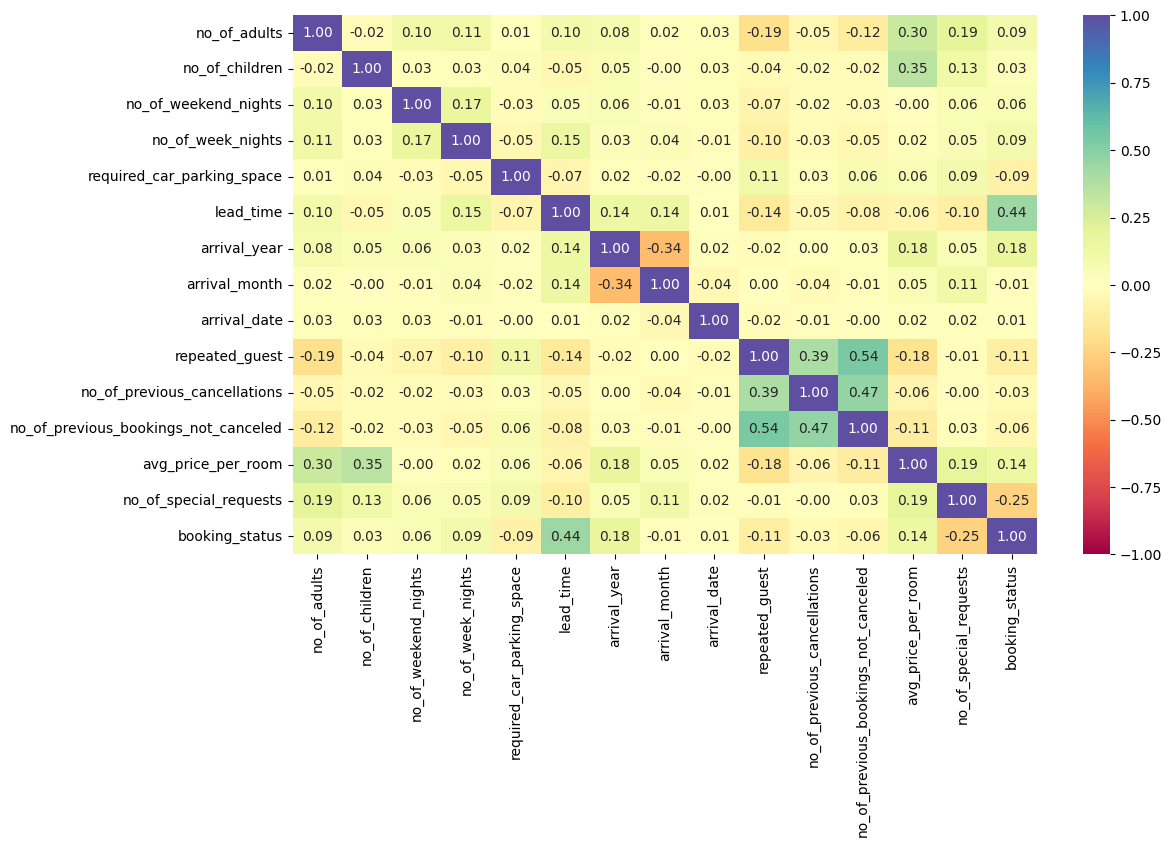

In [49]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##Model Building

**Predicting**
* If we predict that a booking will get canceled and it does not the hotel will lose realiability and satisfactory services for customers.
* If we predict that a booking will not be canceled but it does the hotel will lose costs and resources for having lost that booking.

**Reducing losses**
* The hotel will want the F1 Score to be maximized to minimize the amount of False Negatives and False Positives.


In [50]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [51]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [58]:
data['booking_status'].unique()

array([0, 1])

In [59]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [64]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [65]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* The Test and Train set have equal groups

###Building Logisitc Regression model

In [66]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                  0.3291
Time:                        21:48:39   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.9387    120.840     -7.638      0.000   -1159.782    -686.096
no_of_adults                             0.1133      

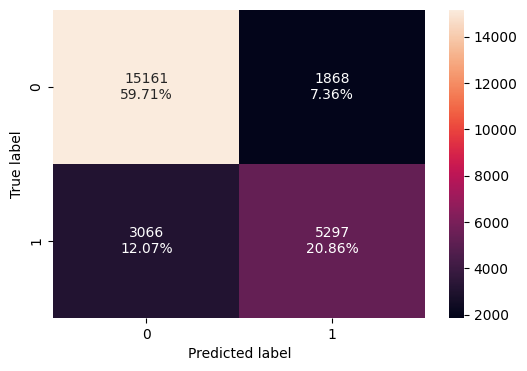

In [70]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [67]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)


Training performance:


Accuracy  Recall  Precision      F1
0   0.80569 0.63339    0.73929 0.68225

* The Training performance has a decent accuracy but low recall and F1-score ~ 0.68.
* Since we are looking for a higher F1-score we will need to look at multicollinearity in the data.

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [68]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [69]:
checking_vif(X_train)

feature            VIF
0                                  const 39497375.65868
1                           no_of_adults        1.35157
2                         no_of_children        2.09394
3                   no_of_weekend_nights        1.06584
4                      no_of_week_nights        1.09529
5             required_car_parking_space        1.04004
6                              lead_time        1.39607
7                           arrival_year        1.43189
8                          arrival_month        1.27640
9                           arrival_date        1.00679
10                        repeated_guest        1.78361
11          no_of_previous_cancellations        1.39570
12  no_of_previous_bookings_not_canceled        1.65204
13                    avg_price_per_room        2.06906
14                no_of_special_requests        1.24878
15         type_of_meal_plan_Meal Plan 2        1.27346
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27351
18        room_type_reserved_Room_Type 2        1.10594
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36372
21        room_type_reserved_Room_Type 5        1.02802
22        room_type_reserved_Room_Type 6        2.05626
23        room_type_reserved_Room_Type 7        1.11817
24     market_segment_type_Complementary        4.50374
25         market_segment_type_Corporate       16.93043
26           market_segment_type_Offline       64.11931
27            market_segment_type_Online       71.18413

* There are several variables with high multicollinearity.
* We will drop market_segment_type_offline since we already have market_segment_type_online

**Dropping columns with high multicollinearity**

In [71]:
X_train1 = X_train.drop("market_segment_type_Offline", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39386211.26524
no_of_adults                                  1.33611
no_of_children                                2.09351
no_of_weekend_nights                          1.06484
no_of_week_nights                             1.09429
required_car_parking_space                    1.03975
lead_time                                     1.38843
arrival_year                                  1.42826
arrival_month                                 1.27565
arrival_date                                  1.00676
repeated_guest                                1.78062
no_of_previous_cancellations                  1.39555
no_of_previous_bookings_not_canceled          1.65171
avg_price_per_room                            2.06868
no_of_special_requests                        1.24838
type_of_meal_plan_Meal Plan 2                 1.27306
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

Our multicollinearity is now fixed. We will check out Logit Regression summary for high p-values

In [72]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training performance:


Accuracy  Recall  Precision      F1
0   0.80636 0.63446    0.74044 0.68337

* The f1-score is still low so we will check our p-values.

In [73]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                  0.3274
Time:                        21:58:22   Log-Likelihood:                -10824.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -964.2348    120.429     -8.007      0.000   -1200.270    -728.199
no_of_adults                             0.0882      

* There are several variables with high p-values.

In [77]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Online']


In [79]:
X_train2 = X_train1[selected_features]

In [101]:
X_test2 = X_test[selected_features]

In [80]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Wed, 23 Aug 2023   Pseudo R-squ.:                  0.3269
Time:                        22:12:15   Log-Likelihood:                -10830.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -951.6826    120.317     -7.910      0.000   -1187.500    -715.865
no_of_adults                       0.0897      0.037      2.397      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

In [81]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80612 0.63398    0.74009 0.68294

###Converting coefficients to odds

In [82]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T


const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.09389         1.16506               1.12068   
Change_odd% -100.00000       9.38910        16.50589              12.06791   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04093                     0.20633    1.01564   
Change_odd%            4.09293                   -79.36719    1.56403   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.59895        0.95999         0.06929   
Change_odd%      59.89476       -4.00093       -93.07071   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.24770             1.01903   
Change_odd%                      24.77043             1.90345   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.23102                        1.17414   
Change_odd%               -76.89818                       17.41390   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.32492                         0.70226   
Change_odd%                        32.49182                       -29.77402   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.77453                         0.48376   
Change_odd%                       -22.54736                       -51.62389   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.39005                         0.24805   
Change_odd%                       -60.99472                       -75.19505   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               2.56948                     5.74746  
Change_odd%                      156.94810                   474.74643

**Coefficient interpretations**
* `required_car_parking_space`: Holding all other features constant a 1 unit change in required car parking space will decrease the odds of a person cancelling by ~0.206 times or a ~79% decrease in odds of cancelling their booking.
* `market_segment_type_Corporate`: Holding all other features constant a 1 unit change in corporate market segment will decrease the odds of a person cancelling by ~2.56 times or a ~157% decrease in odds of cancelling their booking.
**Interpretation for other attributes can be done similarly.**

**Checking model performance**

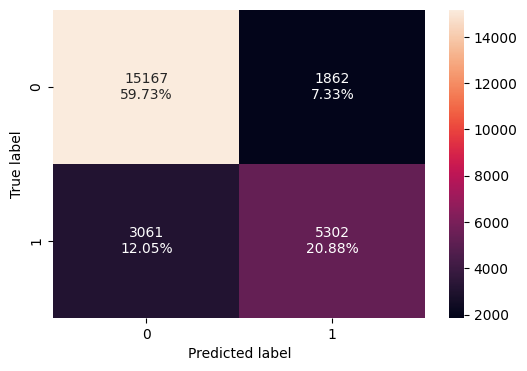

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [85]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)
log_reg_model_train_perf


Training performance:


Accuracy  Recall  Precision      F1
0   0.80612 0.63398    0.74009 0.68294

###ROC-AUC

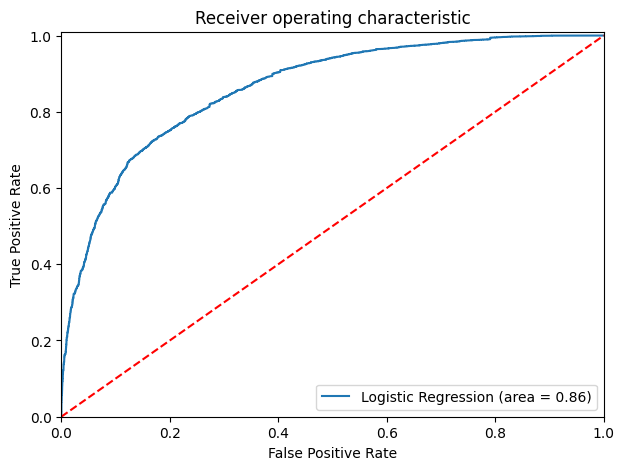

In [86]:
#roc-auc on training set
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Adjusting the threshold to improve the recall score**

In [87]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37245223927787735


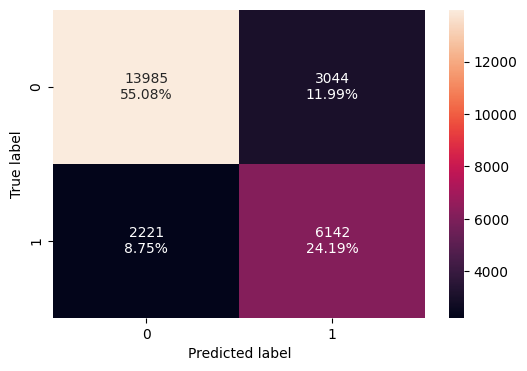

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [89]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73443    0.66863 0.69998

* Recall and f1-score both increased but accuracy and precision slightly decreased.

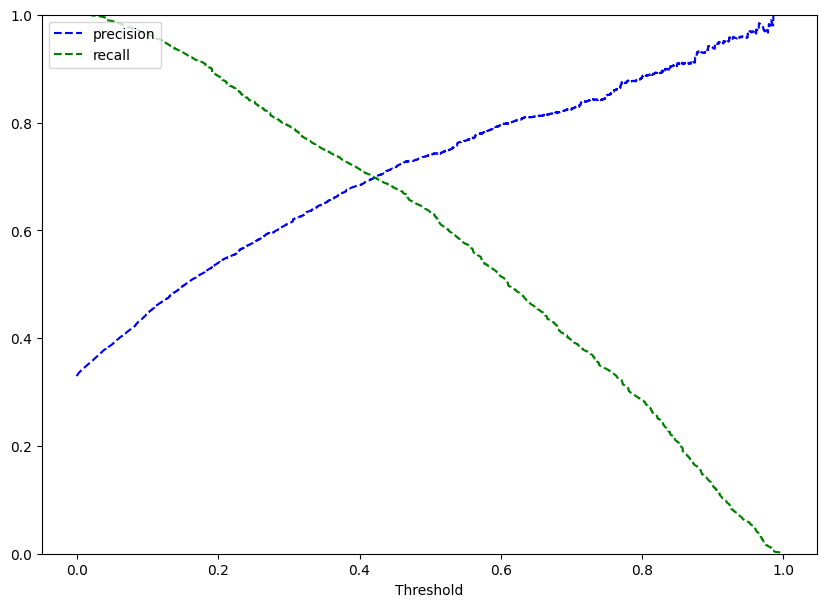

In [93]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [96]:
optimal_threshold_curve = 0.42

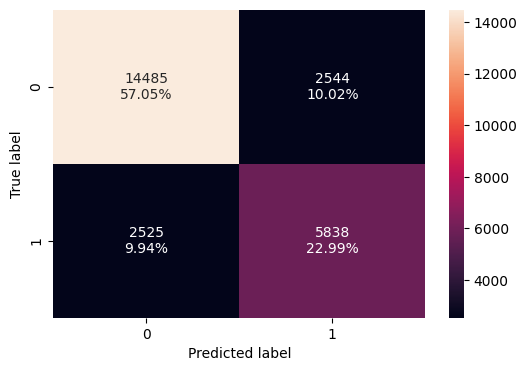

In [97]:
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [98]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve


Training performance:


Accuracy  Recall  Precision      F1
0   0.80037 0.69807    0.69649 0.69728

* The accuracy and precision scores increases slightly while recall and f1-score slightly decreased.

*8Checking performance on test set using default threshold**

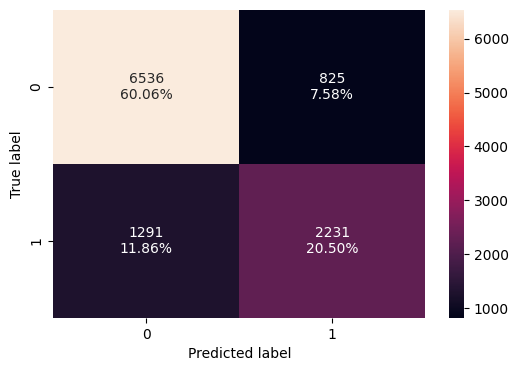

In [104]:
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [105]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80557 0.63345    0.73004 0.67832

**ROC curve on test set**

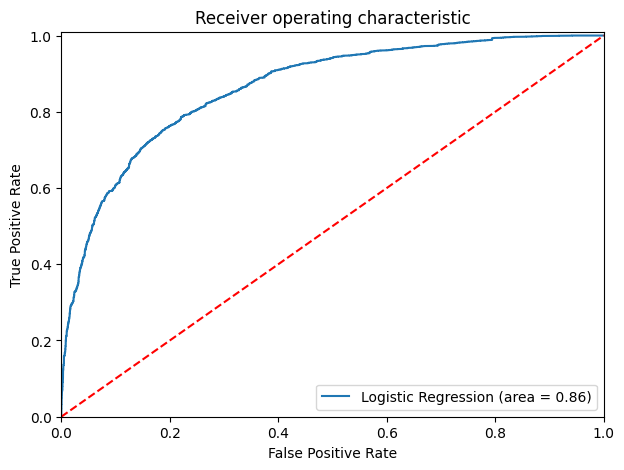

In [106]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Threshold = 0.37**

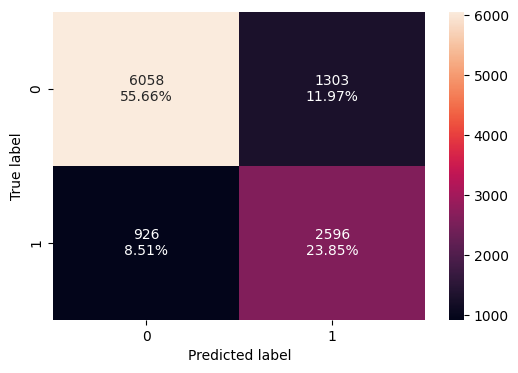

In [107]:
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [108]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79519 0.73708    0.66581 0.69964

**Checking the performance on the test set using threshold 0.42**

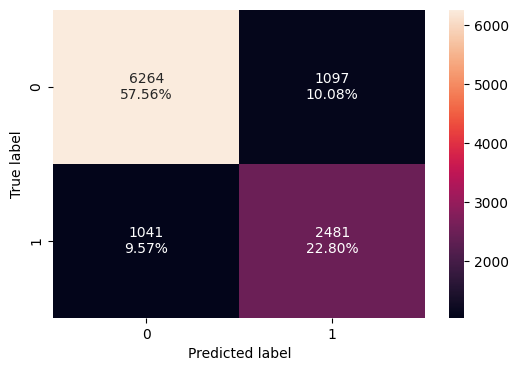

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [109]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
     lg2, X_test2, y_test, threshold=optimal_threshold_curve)

print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80355 0.70443    0.69340 0.69887

* The scores on the test set are the same as the training set.

## Final Model Summary

In [110]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80612   
Recall                                   0.63398   
Precision                                0.74009   
F1                                       0.68294   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73443   
Precision                             0.66863   
F1                                    0.69998   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80037  
Recall                                0.69807  
Precision                             0.69649  
F1                                    0.69728

**Observations**
* F1-Score was the highest on the threshold 0.37 and 0.42
* Logistic Regression -0.42 Threshold has the best overall scores. *(log_reg_model_train_perf_threshold_curve)*

In [111]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80557   
Recall                                   0.63345   
Precision                                0.73004   
F1                                       0.67832   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79519   
Recall                                0.73708   
Precision                             0.66581   
F1                                    0.69964   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80355  
Recall                                0.70443  
Precision                             0.69340  
F1                                    0.69887

* The Logistic Regression with a threshold of 0.42 is giving the best overall scores with f1 being decent.
* We will use the Logisitic Regression-0.42 Threshold as our final model.

# Building a Decision Tree model

In [114]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [115]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


In [116]:

def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [117]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Checking the performance on the train set**

In [119]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

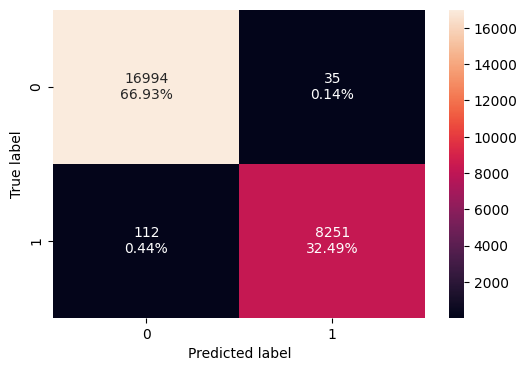

In [120]:
confusion_matrix_sklearn(model, X_train, y_train)

In [121]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

*Observations*
* The scores are very high and almost at 100%, we will need to prune this decision tree.

**Checking the performance on the test set**

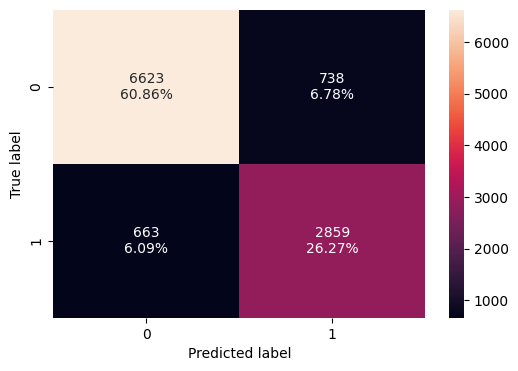

In [122]:
confusion_matrix_sklearn(model, X_test, y_test)

In [123]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test)

decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87127 0.81175    0.79483 0.80320

The test set performance is lower than the train set performance.

**Class Weight = Balanced**

In [154]:
balanced_model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
balanced_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

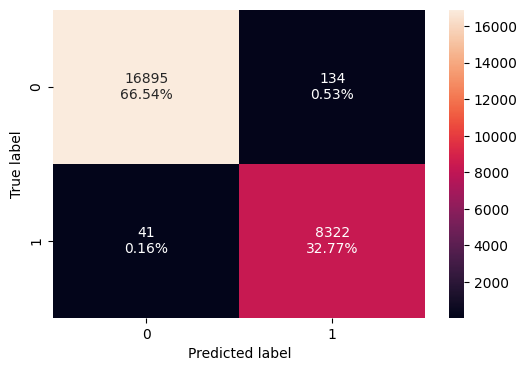

In [155]:
confusion_matrix_sklearn(balanced_model, X_train, y_train)

In [156]:
decision_tree_balanced_train = model_performance_classification_sklearn(
    balanced_model, X_train, y_train)
decision_tree_balanced_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

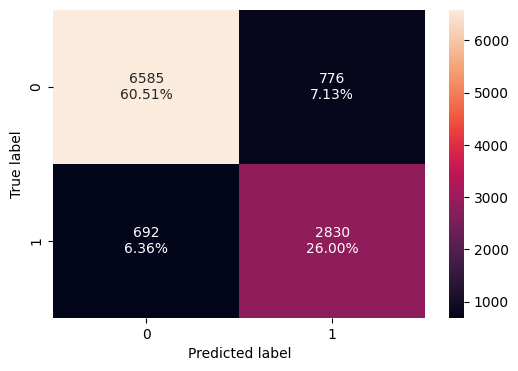

In [159]:
confusion_matrix_sklearn(balanced_model, X_test, y_test)

In [160]:
decision_tree_balanced_test = model_performance_classification_sklearn(
    balanced_model, X_test, y_test)
decision_tree_balanced_test

Accuracy  Recall  Precision      F1
0   0.86511 0.80352    0.78480 0.79405

## Do we need to prune the tree?

* We will need to prune the tree

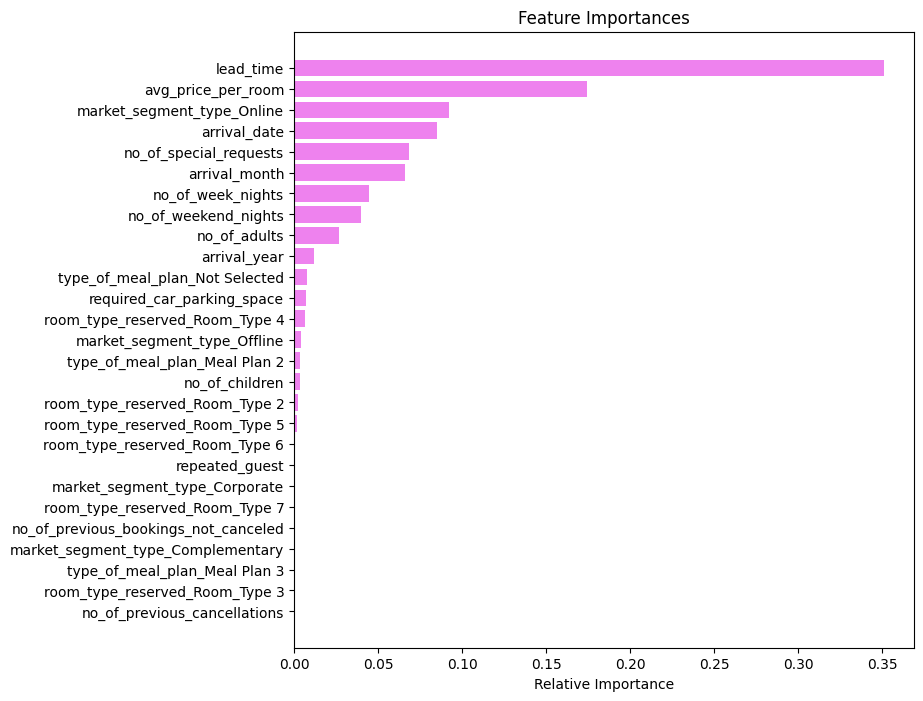

In [124]:
#checking the features before pruning
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Before pruning the most important features are:
 * Lead time
 * Avg price per room
 * Market segment type Online

##Pre-pruning

In [125]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

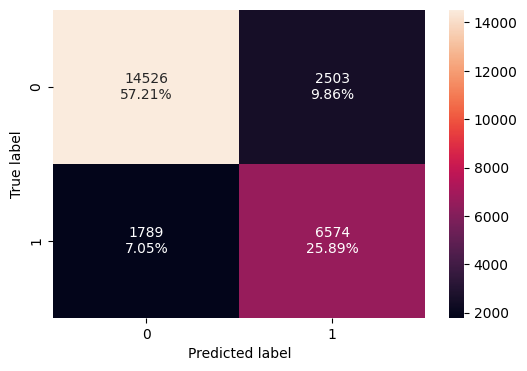

In [126]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [127]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

**Checking the performance on the test set**

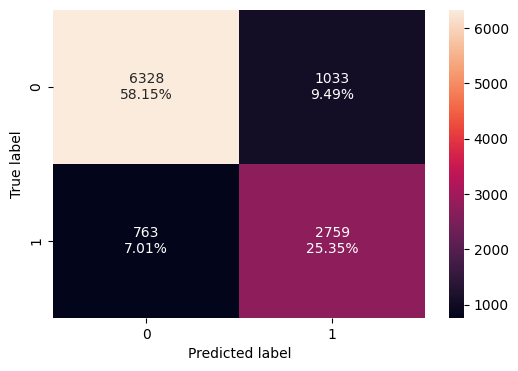

In [129]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [128]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

**Decision Tree Visualization for pre-pruned tree**

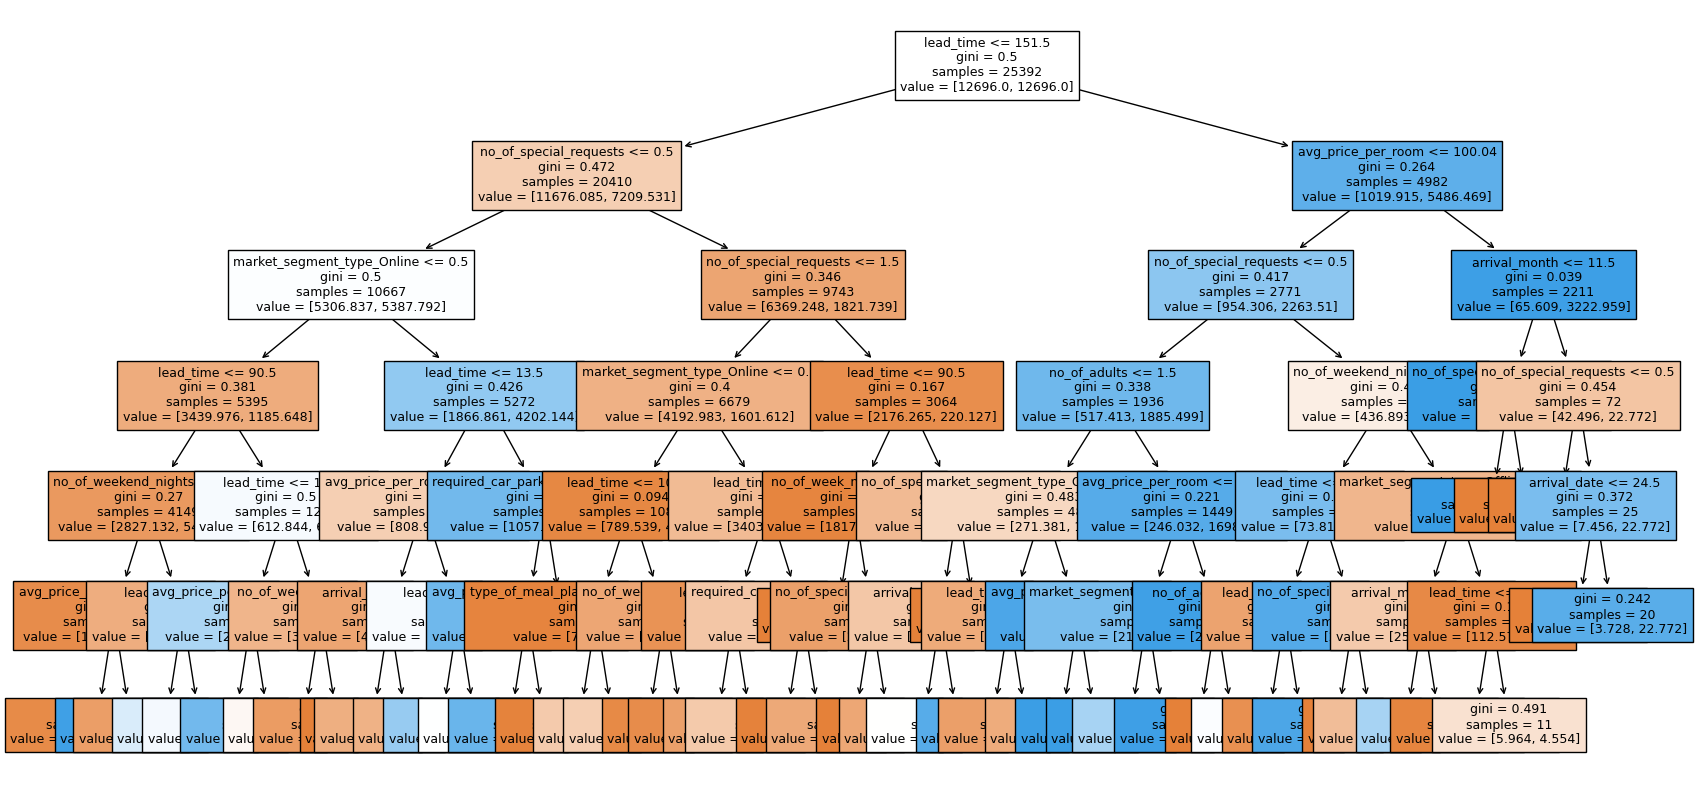

In [130]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

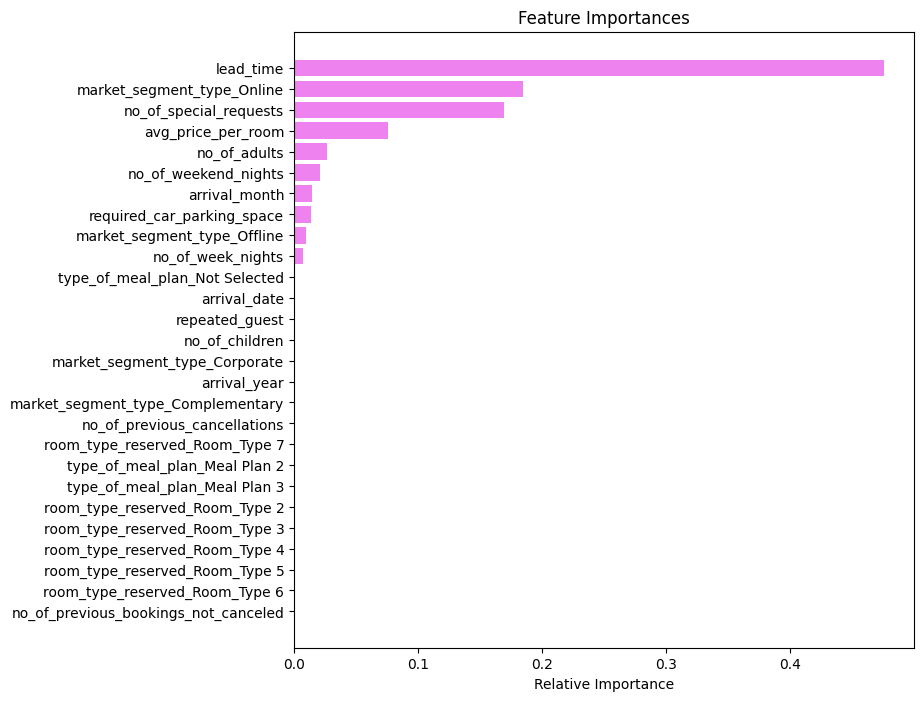

In [132]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##Cost complexity pruning

In [133]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [134]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1831     0.00890     0.32806
1832     0.00980     0.33786
1833     0.01272     0.35058
1834     0.03412     0.41882
1835     0.08118     0.50000

[1836 rows x 2 columns]

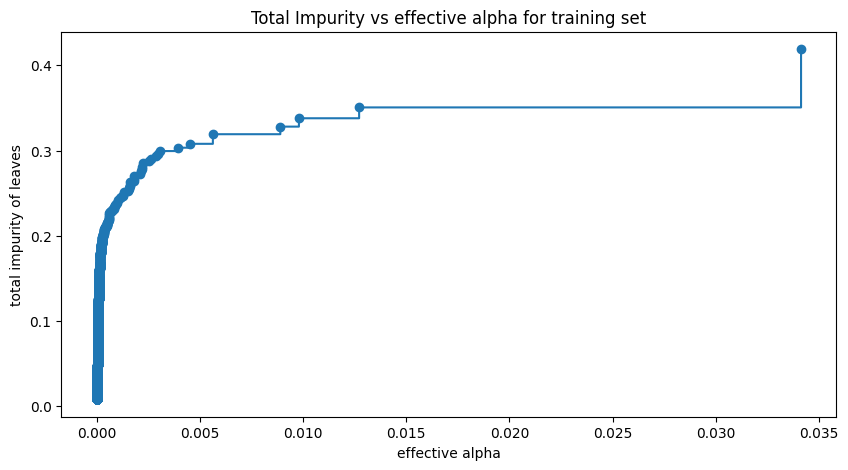

In [135]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [137]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136965


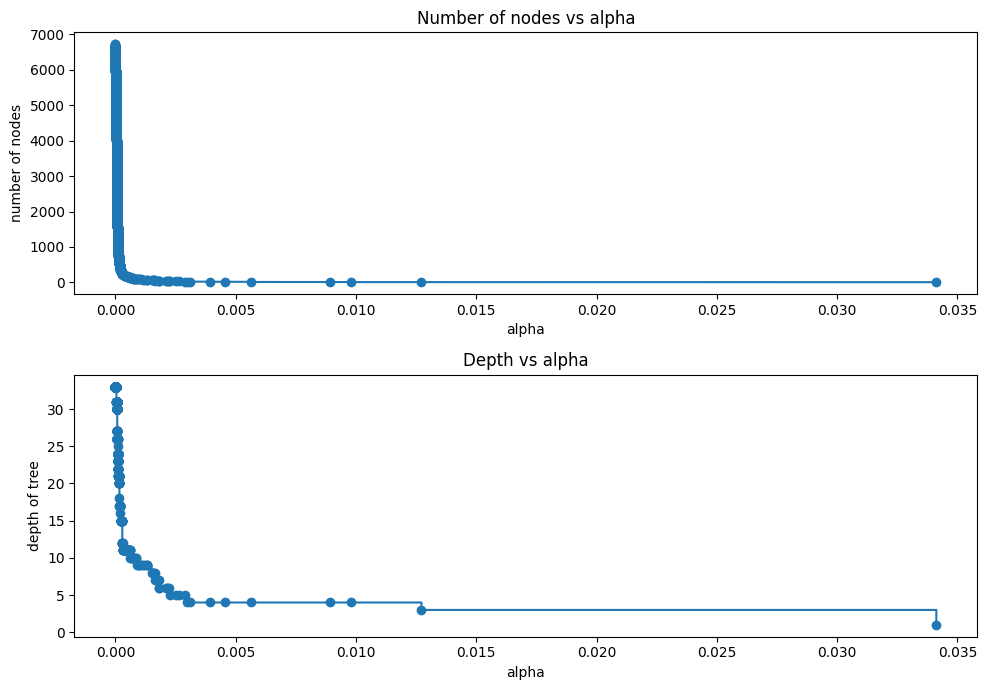

In [138]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**F1 Score vs alpha for training and testing sets**

In [139]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

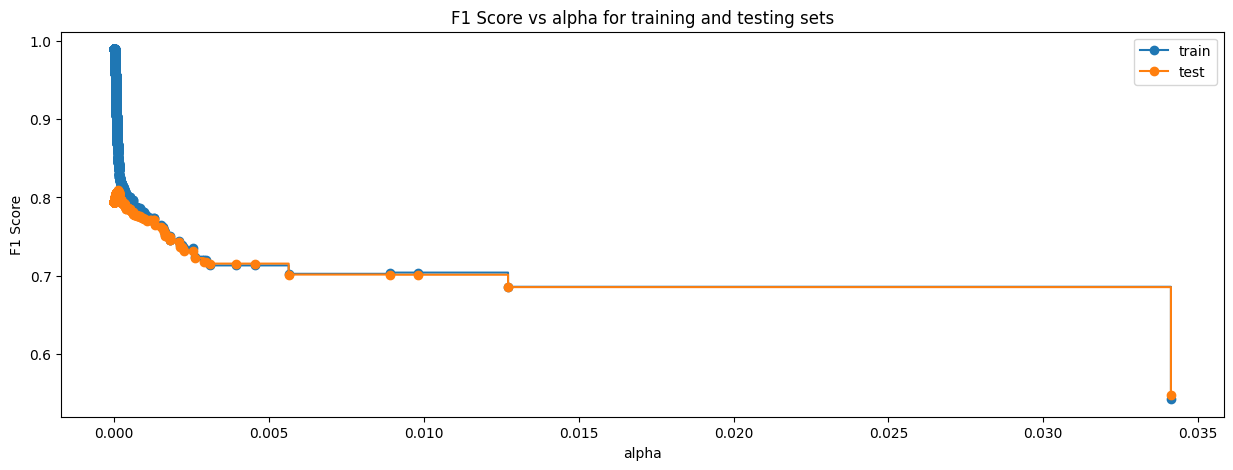

In [140]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [141]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167032,
                       class_weight='balanced', random_state=1)


**Checking performance on training set**

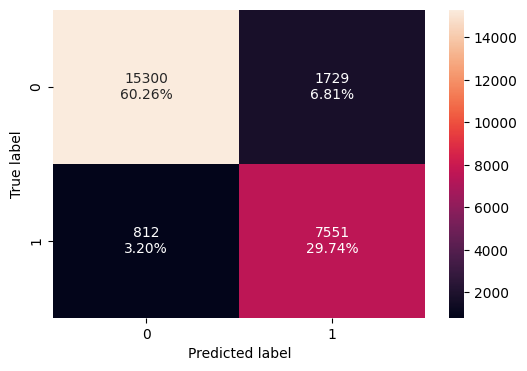

In [142]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [143]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89993 0.90291    0.81369 0.85598

* Our f1 score has increased.

**Checking performance on test set**

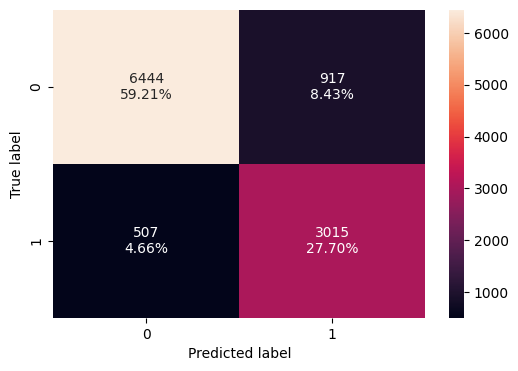

In [144]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [145]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86915 0.85605    0.76679 0.80896

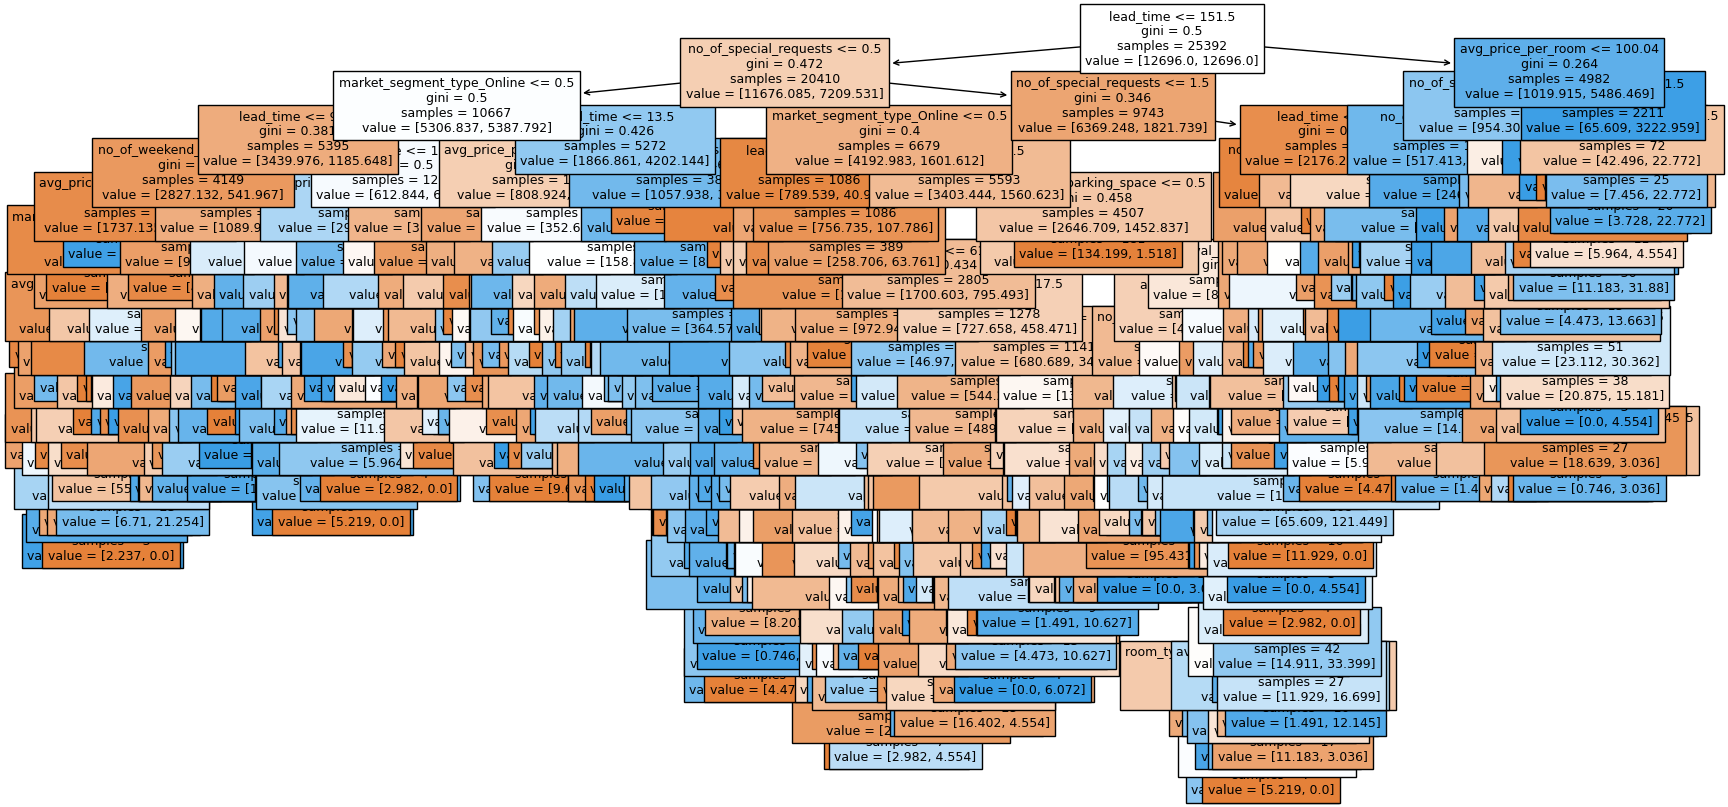

In [146]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [147]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

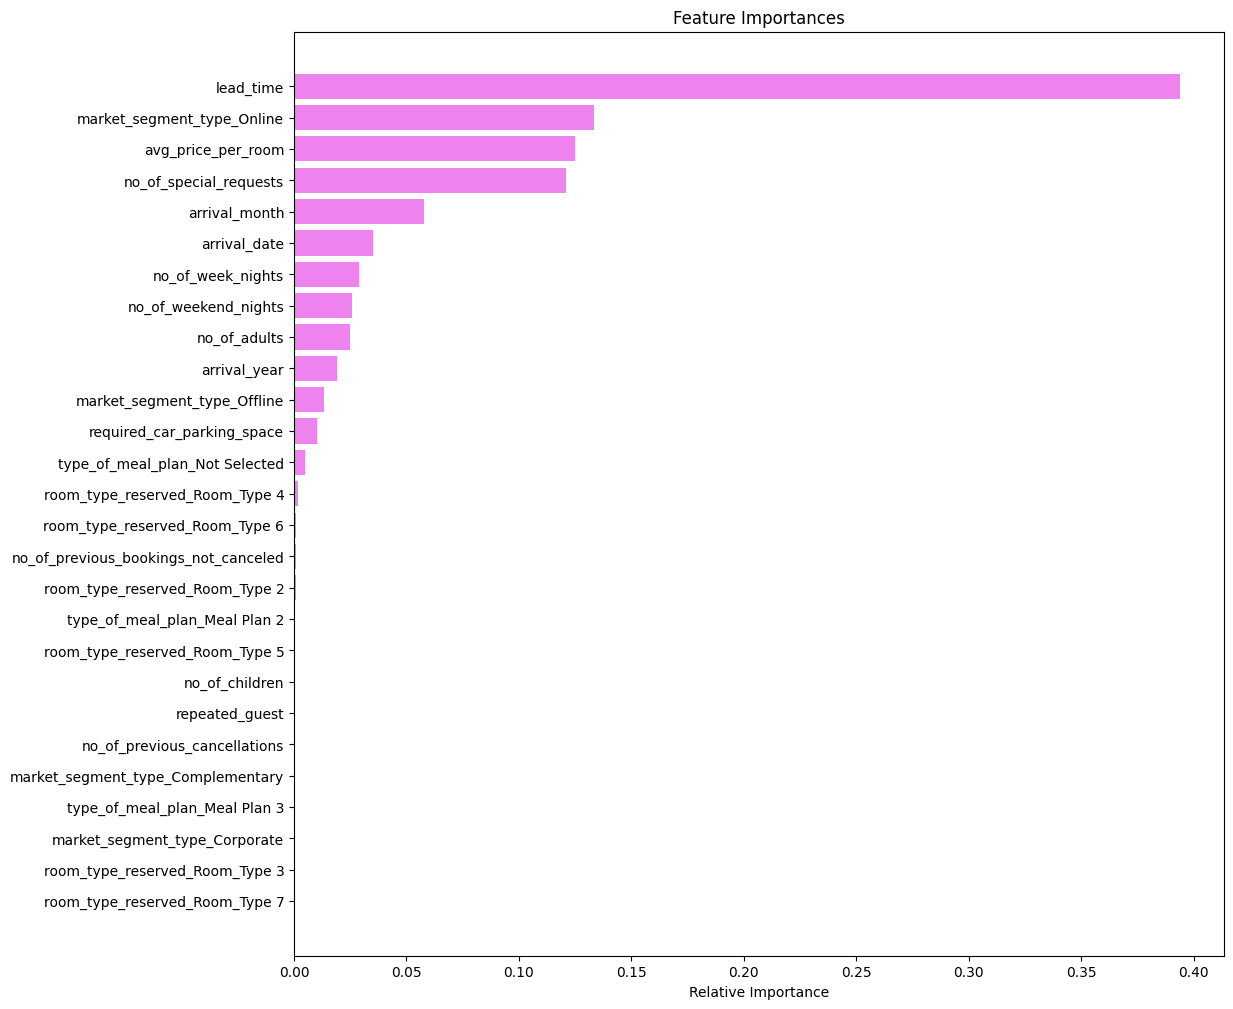

In [148]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Model Performance Comparison and Conclusions

In [158]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_balanced_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree sklearn balanced",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree sklearn balanced  \
Accuracy                 0.99421                         0.99311   
Recall                   0.98661                         0.99510   
Precision                0.99578                         0.98415   
F1                       0.99117                         0.98960   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                       0.83097                       0.89993  
Recall                         0.78608                       0.90291  
Precision                      0.72425                       0.81369  
F1                             0.75390                       0.85598

In [161]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_balanced_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree sklearn balanced",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree sklearn balanced  \
Accuracy                 0.87127                         0.86511   
Recall                   0.81175                         0.80352   
Precision                0.79483                         0.78480   
F1                       0.80320                         0.79405   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                       0.83497                       0.86915  
Recall                         0.78336                       0.85605  
Precision                      0.72758                       0.76679  
F1                             0.75444                       0.80896

* Decision tree sklearn (not pruned) has the best F1 score, Precision and Accuracy on the test set, so we will use this for our final model.

# Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?

* The model built can be used to predict if a customer witll cancel their booking or not and can correctly identify 87% cancellations or not.

* Lead time, Average price per room, and Market segment type: Online are the most important variables in wether a customer will cancel their booking or not.

* The farther ahead (lead_time) a customer books their room, the more likely the chance of cancellation. The company may look into shortening the amount of lead time customers are given.

* Rooms with a higher average price tend to have a higher chance of being cancelled.

* Customers with special requests have a higher chance of cancelling which could cost the company money if the cancellation is last minute.

* 67.2% of the bookings were not canceled while 32.8% of the bookings were canceled.

* October, September, and August are the most popular months for bookings at the hotel.

* The least popular months are January, February and March.

**Policies the hotel can adopt**
* The company can adopt a policy of not allowing bookings more than 200 days in advance.
* The company can charge a cancellation fee for cancellations within 36 hours of their booking and determine the cancellation fee based on the price of the room.